### notebook fot gene-pairwise analysis of kidera and other factors

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as scp
import peptides

In [33]:
#gene freqs OLGA
olga_trb = pd.read_csv('/home/dluppov/TRB_10_7.tsv', sep = '\t', header = None)
olga_trb.rename(columns = {0: 'seq', 1: 'aa', 2: 'V_gene', 3: 'J_gene'}, inplace = True)
olga_trb_freq = olga_trb.V_gene.value_counts()
olga_trb_freq.index = pd.Series(olga_trb_freq.index).apply(lambda x: x.split('-')[0])
olga_trb_freq = olga_trb_freq.groupby(level = 0).sum()
olga_trb_freq

TRBV10     516925
TRBV11     418541
TRBV12     419593
TRBV13     338216
TRBV14     221414
TRBV15     112007
TRBV16       3591
TRBV18     153267
TRBV19     344630
TRBV2      199045
TRBV20     710824
TRBV24     422639
TRBV25     131160
TRBV27     485213
TRBV28     290805
TRBV29     221113
TRBV3      230358
TRBV30     218457
TRBV4      379600
TRBV5     1044209
TRBV6     1451585
TRBV7     1297763
TRBV9      389045
Name: V_gene, dtype: int64

In [34]:
# gene greqs KECK
keck_raw = pd.read_csv('/home/dluppov/tcr-thymic-selection/naive_cells/hip_full/naive_clonotypes_keck.csv.gz')
keck_raw = keck_raw.loc[np.logical_and(keck_raw.cdr3aa.str.startswith('C'),
               np.logical_or(keck_raw.cdr3aa.str.endswith('W'), keck_raw.cdr3aa.str.endswith('F')))]
               
keck_raw_freq = keck_raw.v.value_counts()
keck_raw_freq.index = pd.Series(keck_raw_freq.index).apply(lambda x: x.split(',')[0])
keck_raw_freq = keck_raw_freq.groupby(level = 0).sum()
keck_raw_freq.index = pd.Series(keck_raw_freq.index).apply(lambda x: x.split('-')[0])
keck_raw_freq = keck_raw_freq.groupby(level = 0).sum()
keck_raw_freq

TRBV1        682
TRBV10     28299
TRBV11     32260
TRBV12     46489
TRBV13      7406
TRBV14      8722
TRBV15     14827
TRBV16       900
TRBV18     23168
TRBV19     48921
TRBV2      36173
TRBV20     93946
TRBV21      5313
TRBV22         9
TRBV23      1990
TRBV24     18398
TRBV25      9247
TRBV27     38422
TRBV28     48134
TRBV29     25283
TRBV3      31136
TRBV30     33064
TRBV4      52028
TRBV5     101034
TRBV6     118116
TRBV7     102485
TRBV8         10
TRBV9      38427
Name: v, dtype: int64

In [35]:
#same order
olga_trb_freq = olga_trb_freq.sort_values(ascending=False)
keck_raw_freq = keck_raw_freq[olga_trb_freq.index]

<AxesSubplot:ylabel='Count'>

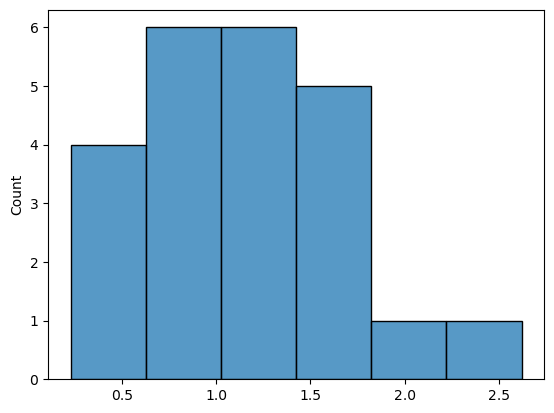

In [36]:
#ratio of gene freqs
freq_compare = (keck_raw_freq/keck_raw_freq.sum())/(olga_trb_freq/olga_trb_freq.sum())
sns.histplot(freq_compare)

# Paired genes

In [37]:
olga_trb.V_gene = olga_trb.V_gene.apply(lambda x: x.split('-')[0])
olga_trb.J_gene = olga_trb.J_gene.apply(lambda x: x.split('-')[0])
olga_trb.insert(4, 'VJ', olga_trb.V_gene + '-' + olga_trb.J_gene)
olga_trb

seq  \
0                  TGTGCCAGCAGCGGTAGGGGGACACTATTGGGCACCTTC   
1                              TGTGGACGGAAGGACGAGCAGTACTTC   
2                     TGCAGTGCTCGGGGCGTCTTCTCTGAAGCTTTCTTT   
3            TGTGCCACCAATGACAGGGGGCGCACCTACAATGAGCAGTTCTTC   
4        TGTGCCAGCAGTTTAGCTGGACTAGCGGGTTGTCGGAAGTTGACGG...   
...                                                    ...   
9999995  TGTGCCAGCAGTTACTCGACCCGCCCGGTGCGGACCGGGGAGCTGT...   
9999996      TGTGCCCCGGAGGGGGAGAGGGGGGGGTCCTACGAGCAGTACTTC   
9999997         TGTGCCAGCAGCCAAGACCCGGGACAGGGTTCGGCTTTCTTT   
9999998   TGCAGTGCTAGAGATCGCCGGGACAGGGGGAACACTGAAGCTTTCTTT   
9999999  TGTGCCAGCTCACCACCCTGCCGGCGCCTTAGCTATCTCACAGATA...   

                            aa  V_gene J_gene            VJ  
0                CASSGRGTLLGTF   TRBV7  TRBJ1   TRBV7-TRBJ1  
1                    CGRKDEQYF  TRBV20  TRBJ2  TRBV20-TRBJ2  
2                 CSARGVFSEAFF  TRBV20  TRBJ1  TRBV20-TRBJ1  
3              CATNDRGRTYNEQFF  TRBV24  TRBJ2  TRBV24-TRBJ2  
4        CASSLAGLAGCRKLTEETQYF  TRBV27  TRBJ2  TRBV27-TRBJ2  
...                        ...     ...    ...           ...  
9999995      CASSYSTRPVRTGELFF   TRBV6  TRBJ2   TRBV6-TRBJ2  
9999996        CAPEGERGGSYEQYF  TRBV24  TRBJ2  TRBV24-TRBJ2  
9999997         CASSQDPGQGSAFF   TRBV3  TRBJ1   TRBV3-TRBJ1  
9999998       CSARDRRDRGNTEAFF  TRBV20  TRBJ1  TRBV20-TRBJ1  
9999999    CASSPPCRRLSYLTDTQYF  TRBV18  TRBJ2  TRBV18-TRBJ2  

[10000000 rows x 5 columns]

In [38]:
keck_raw.v = keck_raw.v.apply(lambda x: x.split(',')[0].split('-')[0])
keck_raw.j = keck_raw.j.apply(lambda x: x.split(',')[0].split('-')[0])

In [39]:
keck_raw.insert(3, 'VJ', keck_raw.v + '-' + keck_raw.j)
keck_vj_freq = keck_raw.VJ.value_counts()
olga_trb_vj_freq = olga_trb.VJ.value_counts()

In [21]:
common_pairs = list(set(olga_trb_vj_freq.index).intersection(set(keck_vj_freq.index)))

In [22]:
olga_trb_vj_freq = olga_trb_vj_freq[common_pairs]
keck_vj_freq = keck_vj_freq[common_pairs]

In [23]:
comp_pairs_freq = (keck_vj_freq/keck_vj_freq.sum())/(olga_trb_vj_freq/olga_trb_vj_freq.sum())

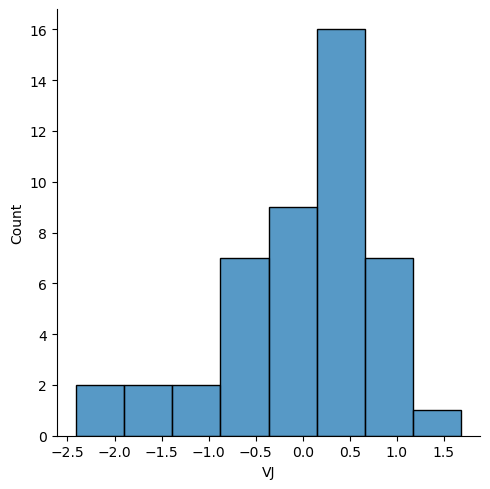

In [24]:
sns.displot(np.log2(comp_pairs_freq))

In [25]:
comp_pairs_freq_sign = comp_pairs_freq[np.logical_or(np.log2(comp_pairs_freq) < -0.7,
                                                      np.log2(comp_pairs_freq) > 0.7)]

In [26]:
comp_pairs_freq_sign

TRBV10-TRBJ2    0.595216
TRBV28-TRBJ1    1.971867
TRBV14-TRBJ1    0.377778
TRBV19-TRBJ1    1.732928
TRBV2-TRBJ1     1.950713
TRBV14-TRBJ2    0.437284
TRBV2-TRBJ2     1.860259
TRBV24-TRBJ2    0.568586
TRBV10-TRBJ1    0.541646
TRBV16-TRBJ2    2.178056
TRBV24-TRBJ1    0.304740
TRBV13-TRBJ2    0.259457
TRBV18-TRBJ1    1.702535
TRBV13-TRBJ1    0.188571
TRBV16-TRBJ1    3.202051
TRBV30-TRBJ1    1.863898
Name: VJ, dtype: float64

# Physical properties

In [74]:
import peptides

/home/dluppov/.conda-envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


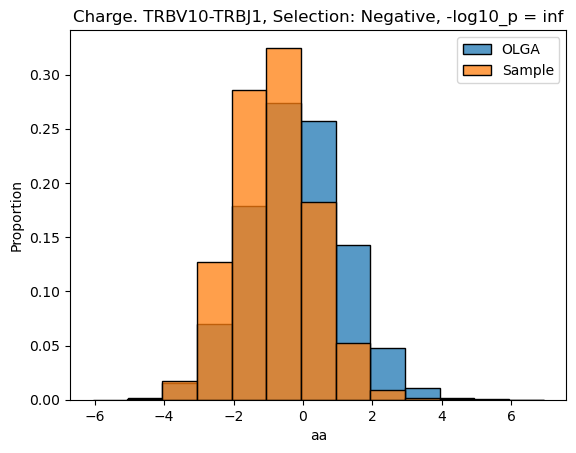

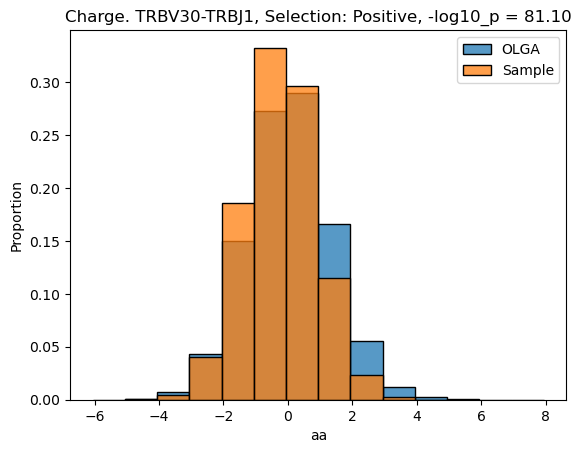

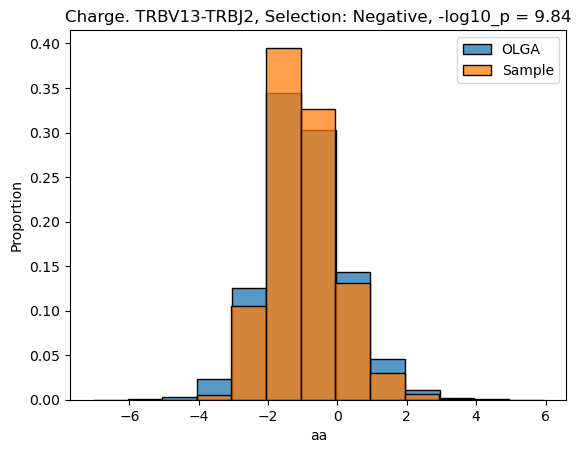

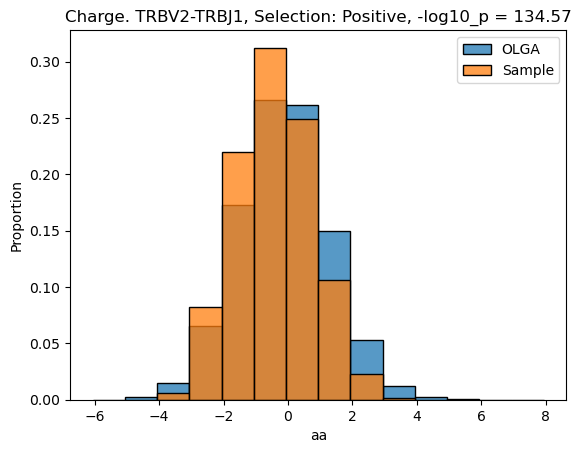

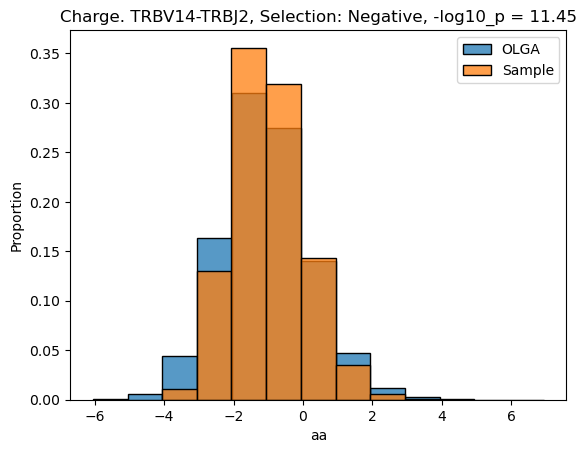

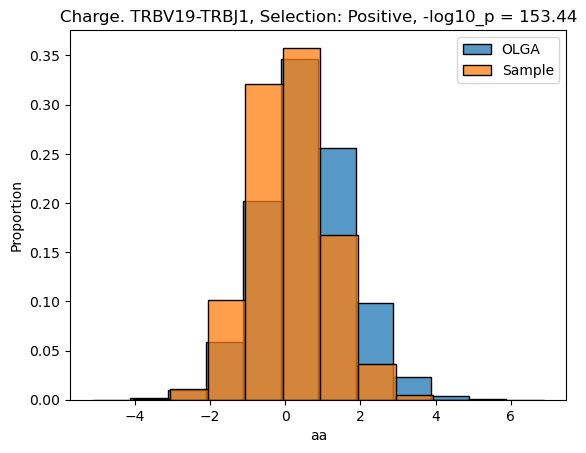

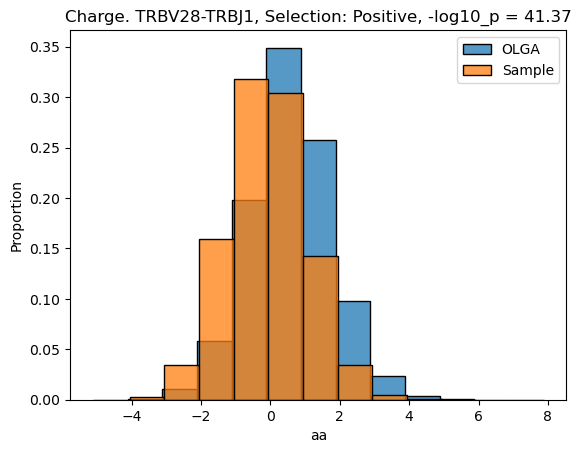

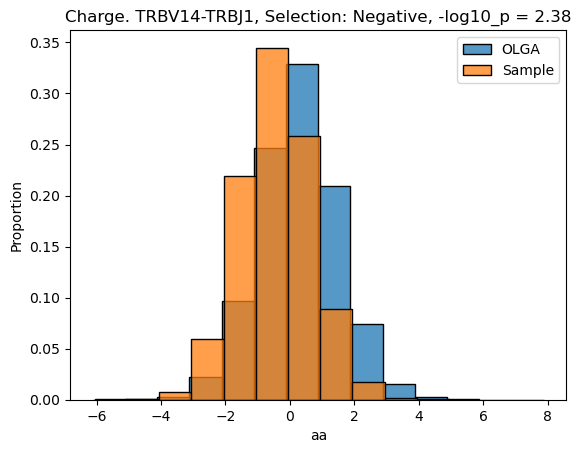

/home/dluppov/.conda-envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


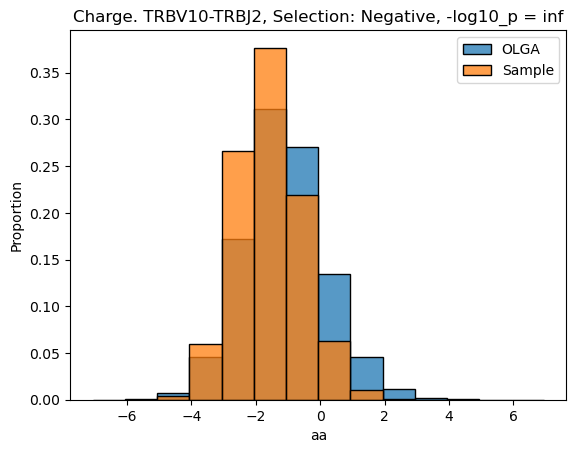

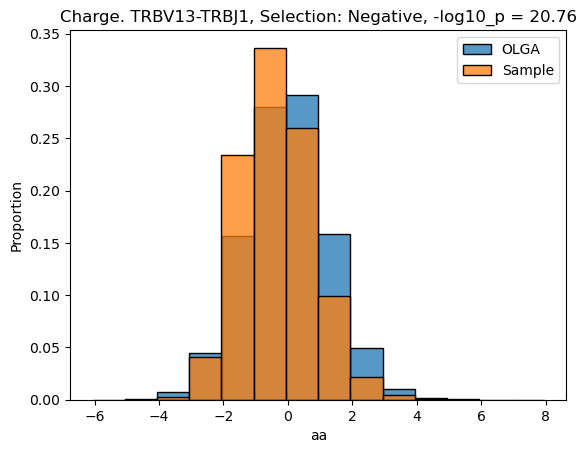

/home/dluppov/.conda-envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


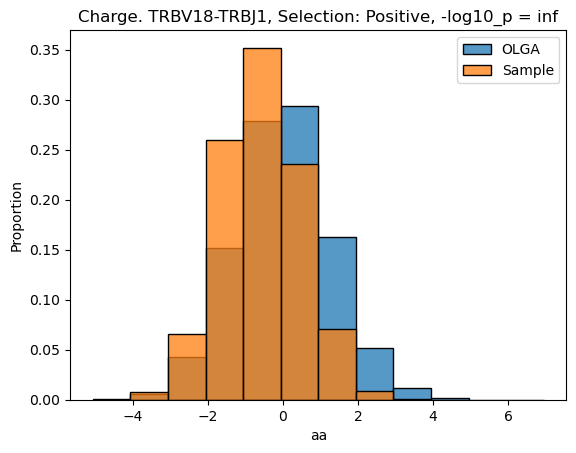

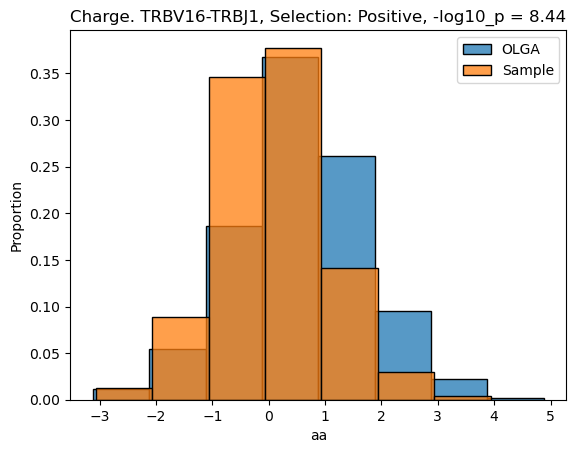

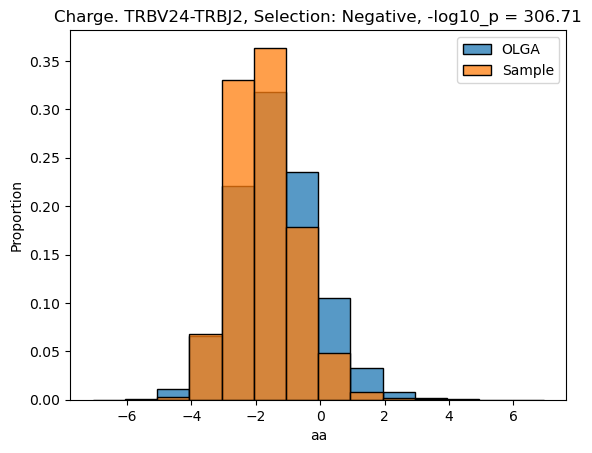

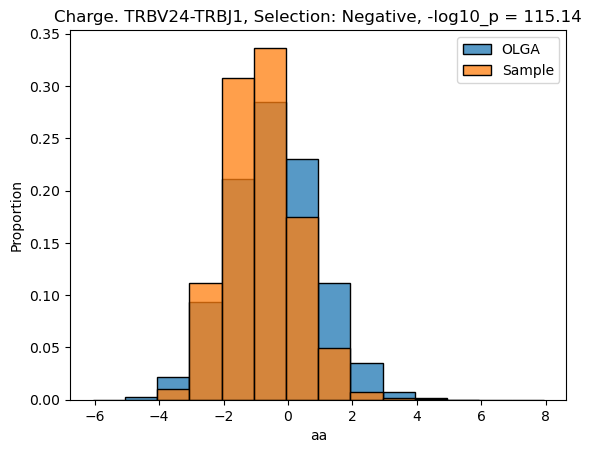

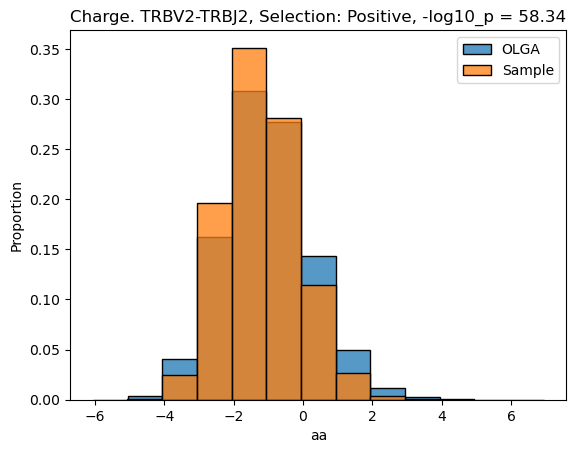

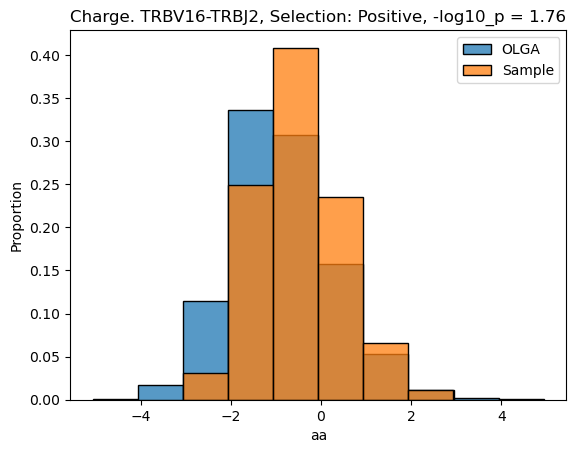

In [19]:
#charge difference in genes with largest freqs ratios
for gene in comp_pairs_freq_sign.index:

    keck_raw_gene = keck_raw[keck_raw.VJ == gene]
    olga_trb_gene = olga_trb[olga_trb.VJ == gene]
    keck_raw_gene_charge = keck_raw_gene.cdr3aa.apply(lambda x: peptides.Peptide(x).charge())
    olga_trb_gene_charge = olga_trb_gene.aa.apply(lambda x: peptides.Peptide(x).charge())
    #sns.set(rc={'axes.facecolor':'r'})
    sns.histplot(olga_trb_gene_charge, binwidth= 1 , stat = 'proportion', label = 'OLGA')
    sns.histplot(keck_raw_gene_charge, binwidth= 1 , stat = 'proportion', label = 'Sample')
    selection = 'Positive' if comp_pairs_freq_sign[gene] > 1 else 'Negative'
    log10_pval = -np.log10(scp.stats.ttest_ind(keck_raw_gene_charge, olga_trb_gene_charge, equal_var = False).pvalue)
    plt.title(f'Charge. {gene}, Selection: {selection}, -log10_p = {log10_pval:.2f}')
    plt.legend()
    plt.show()

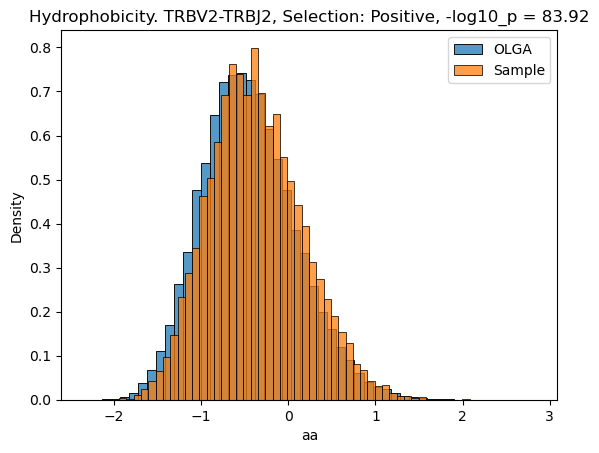

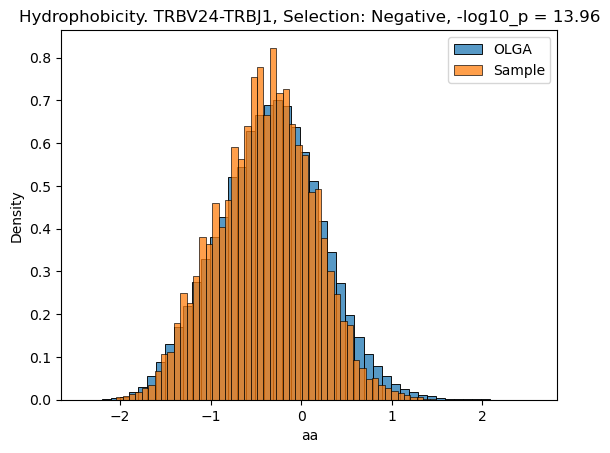

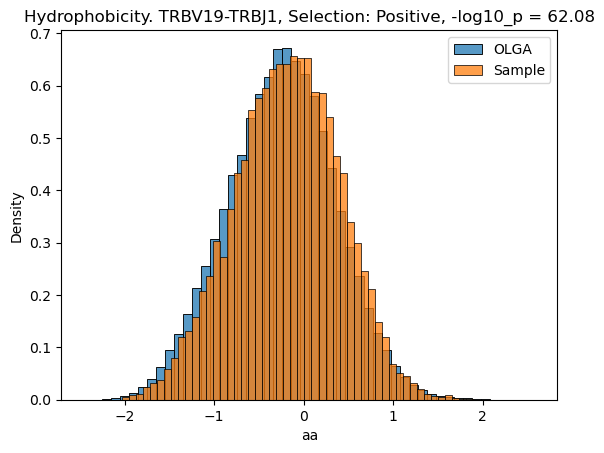

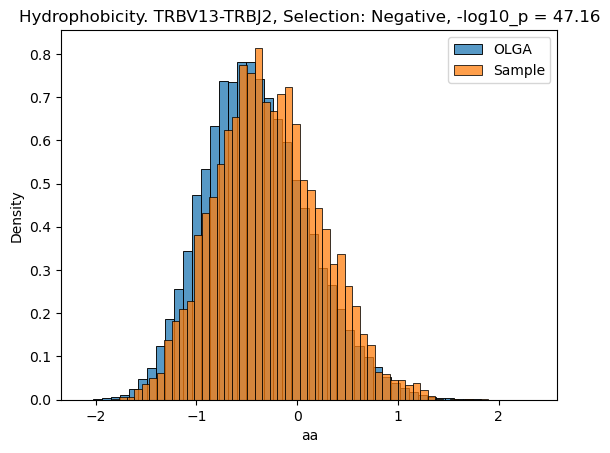

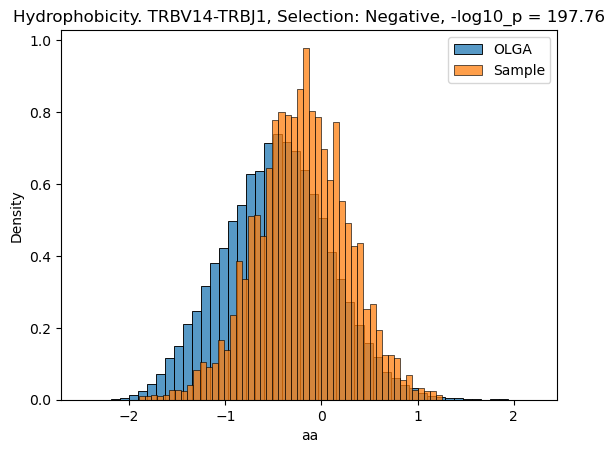

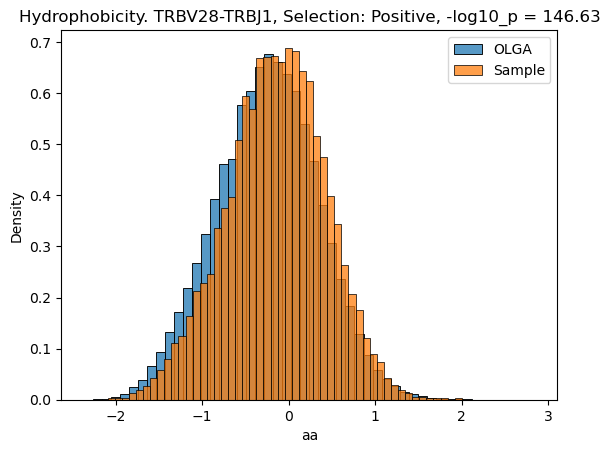

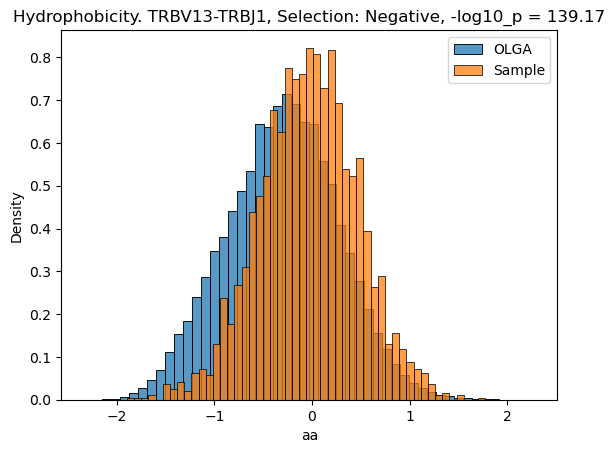

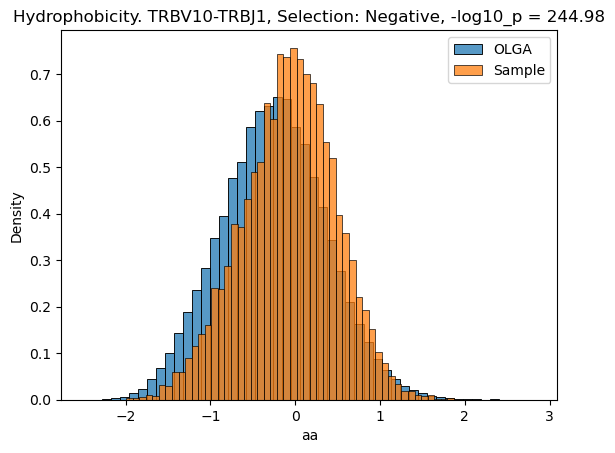

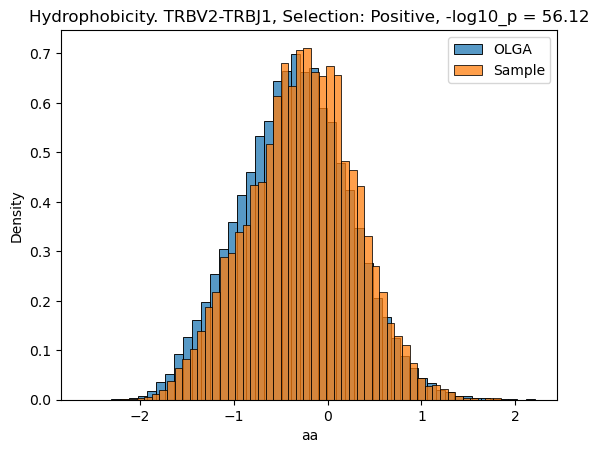

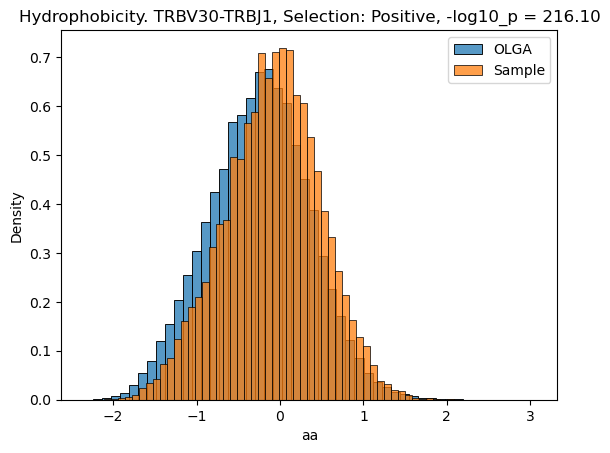

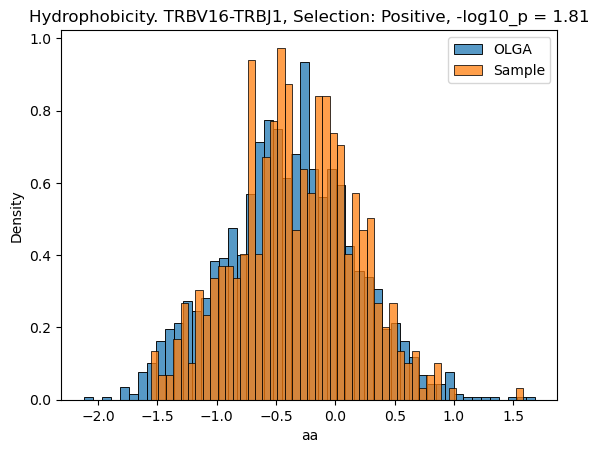

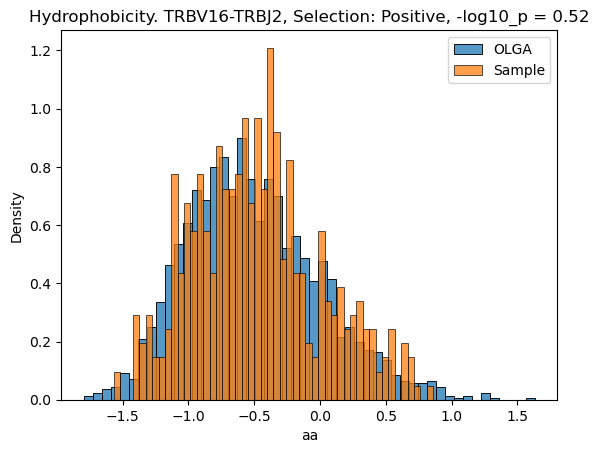

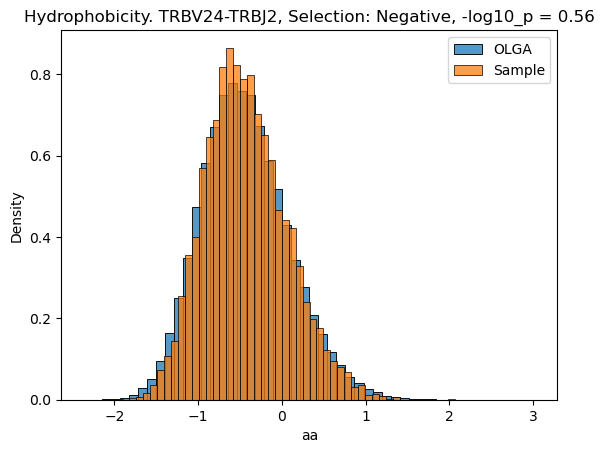

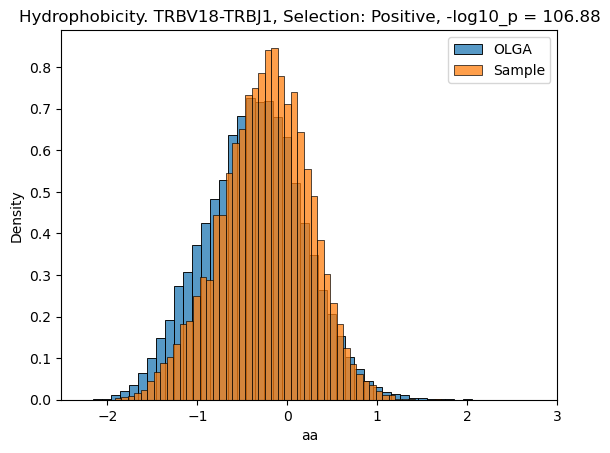

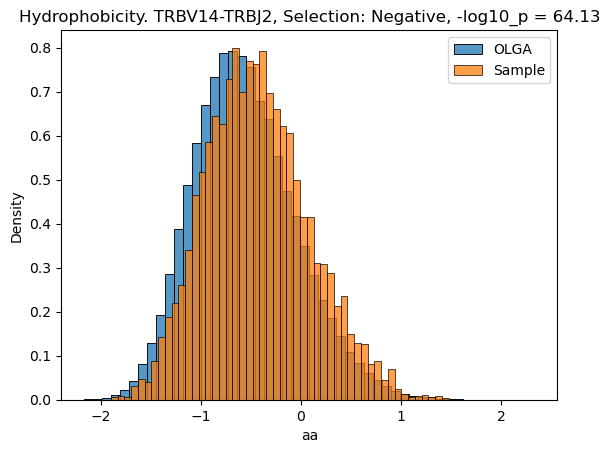

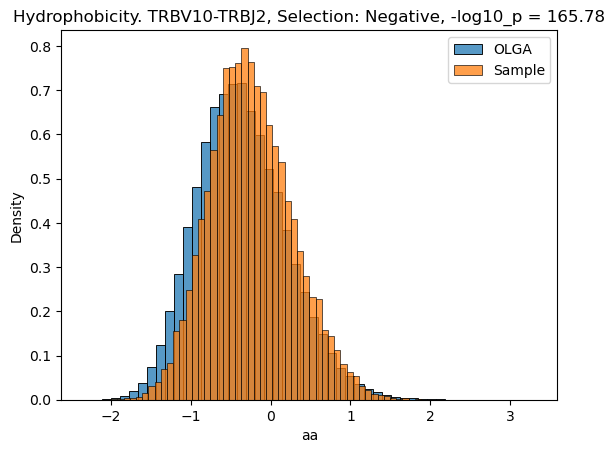

In [44]:
#Hydrophobicity difference in genes with largest freqs ratios
for gene in comp_pairs_freq_sign.index:

    keck_raw_gene = keck_raw[keck_raw.VJ == gene]
    olga_trb_gene = olga_trb[olga_trb.VJ == gene]
    keck_raw_gene_charge = keck_raw_gene.cdr3aa.apply(lambda x: peptides.Peptide(x).hydrophobicity())
    olga_trb_gene_charge = olga_trb_gene.aa.apply(lambda x: peptides.Peptide(x).hydrophobicity())
    #sns.set(rc={'axes.facecolor':'r'})
    sns.histplot(olga_trb_gene_charge, bins = 50 , stat = 'density', label = 'OLGA')
    sns.histplot(keck_raw_gene_charge, bins = 50 , stat = 'density', label = 'Sample')
    selection = 'Positive' if comp_pairs_freq_sign[gene] > 1 else 'Negative'
    log10_pval = -np.log10(scp.stats.ttest_ind(keck_raw_gene_charge, olga_trb_gene_charge, equal_var = False).pvalue)
    plt.title(f'Hydrophobicity. {gene}, Selection: {selection}, -log10_p = {log10_pval:.2f}')
    plt.legend()
    plt.show()

In [22]:
#Kidera difference in genes with largest freqs ratioskidera_dict = {}

for gene in comp_pairs_freq_sign.index:
    keck_raw_gene = keck_raw[keck_raw.VJ == gene]
    olga_trb_gene = olga_trb[olga_trb.VJ == gene]
    kidera_dict[gene] = {'Sample':keck_raw_gene.cdr3aa.apply(lambda x: peptides.Peptide(x).kidera_factors()),
                         'OLGA': olga_trb_gene.aa.apply(lambda x: peptides.Peptide(x).kidera_factors())}

# Kideras distribution for gene pairs with largest selection ratios

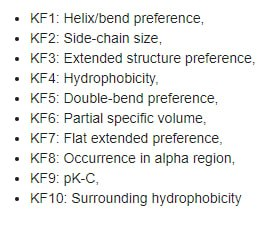

In [44]:
#files created in a senction Inpairs scaling

olga_kid = pd.read_csv('/home/dluppov/OLGA_all_kideras.csv', index_col=0)
keck_kid = pd.read_csv('/home/dluppov/keck_all_kideras.csv', index_col=0)

In [6]:
gene_pairs = list(set(olga_kid.VJ))

['TRBV5-TRBJ1',
 'TRBV24-TRBJ2',
 'TRBV15-TRBJ2',
 'TRBV29-TRBJ2',
 'TRBV2-TRBJ1',
 'TRBV18-TRBJ1',
 'TRBV10-TRBJ1',
 'TRBV19-TRBJ2',
 'TRBV16-TRBJ1',
 'TRBV10-TRBJ2',
 'TRBV9-TRBJ1',
 'TRBV6-TRBJ1',
 'TRBV5-TRBJ2',
 'TRBV4-TRBJ2',
 'TRBV2-TRBJ2',
 'TRBV13-TRBJ2',
 'TRBV4-TRBJ1',
 'TRBV20-TRBJ1',
 'TRBV12-TRBJ2',
 'TRBV27-TRBJ2',
 'TRBV14-TRBJ1',
 'TRBV24-TRBJ1',
 'TRBV25-TRBJ1',
 'TRBV18-TRBJ2',
 'TRBV11-TRBJ2',
 'TRBV7-TRBJ1',
 'TRBV9-TRBJ2',
 'TRBV19-TRBJ1',
 'TRBV16-TRBJ2',
 'TRBV14-TRBJ2',
 'TRBV15-TRBJ1',
 'TRBV3-TRBJ1',
 'TRBV6-TRBJ2',
 'TRBV27-TRBJ1',
 'TRBV30-TRBJ1',
 'TRBV3-TRBJ2',
 'TRBV20-TRBJ2',
 'TRBV25-TRBJ2',
 'TRBV7-TRBJ2',
 'TRBV13-TRBJ1',
 'TRBV11-TRBJ1',
 'TRBV30-TRBJ2',
 'TRBV29-TRBJ1',
 'TRBV28-TRBJ2',
 'TRBV28-TRBJ1',
 'TRBV12-TRBJ1']

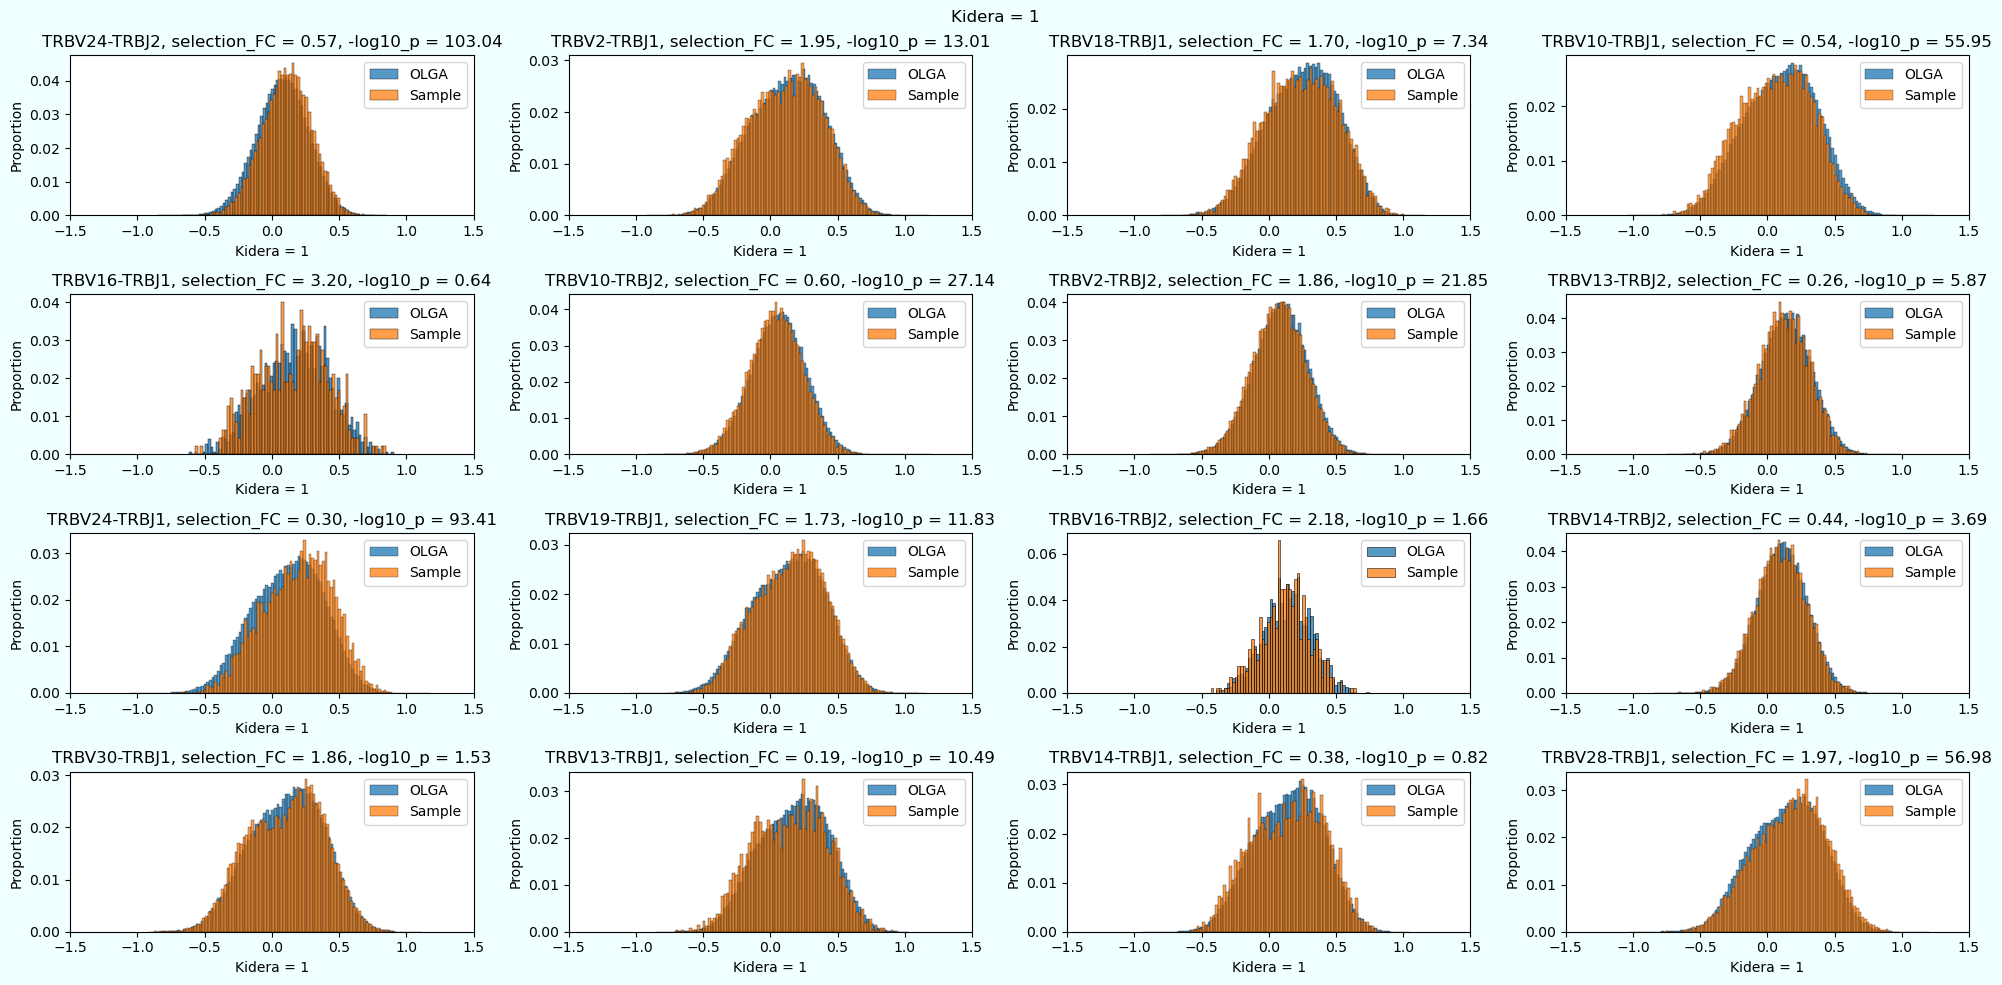

/home/dluppov/.conda-envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/home/dluppov/.conda-envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


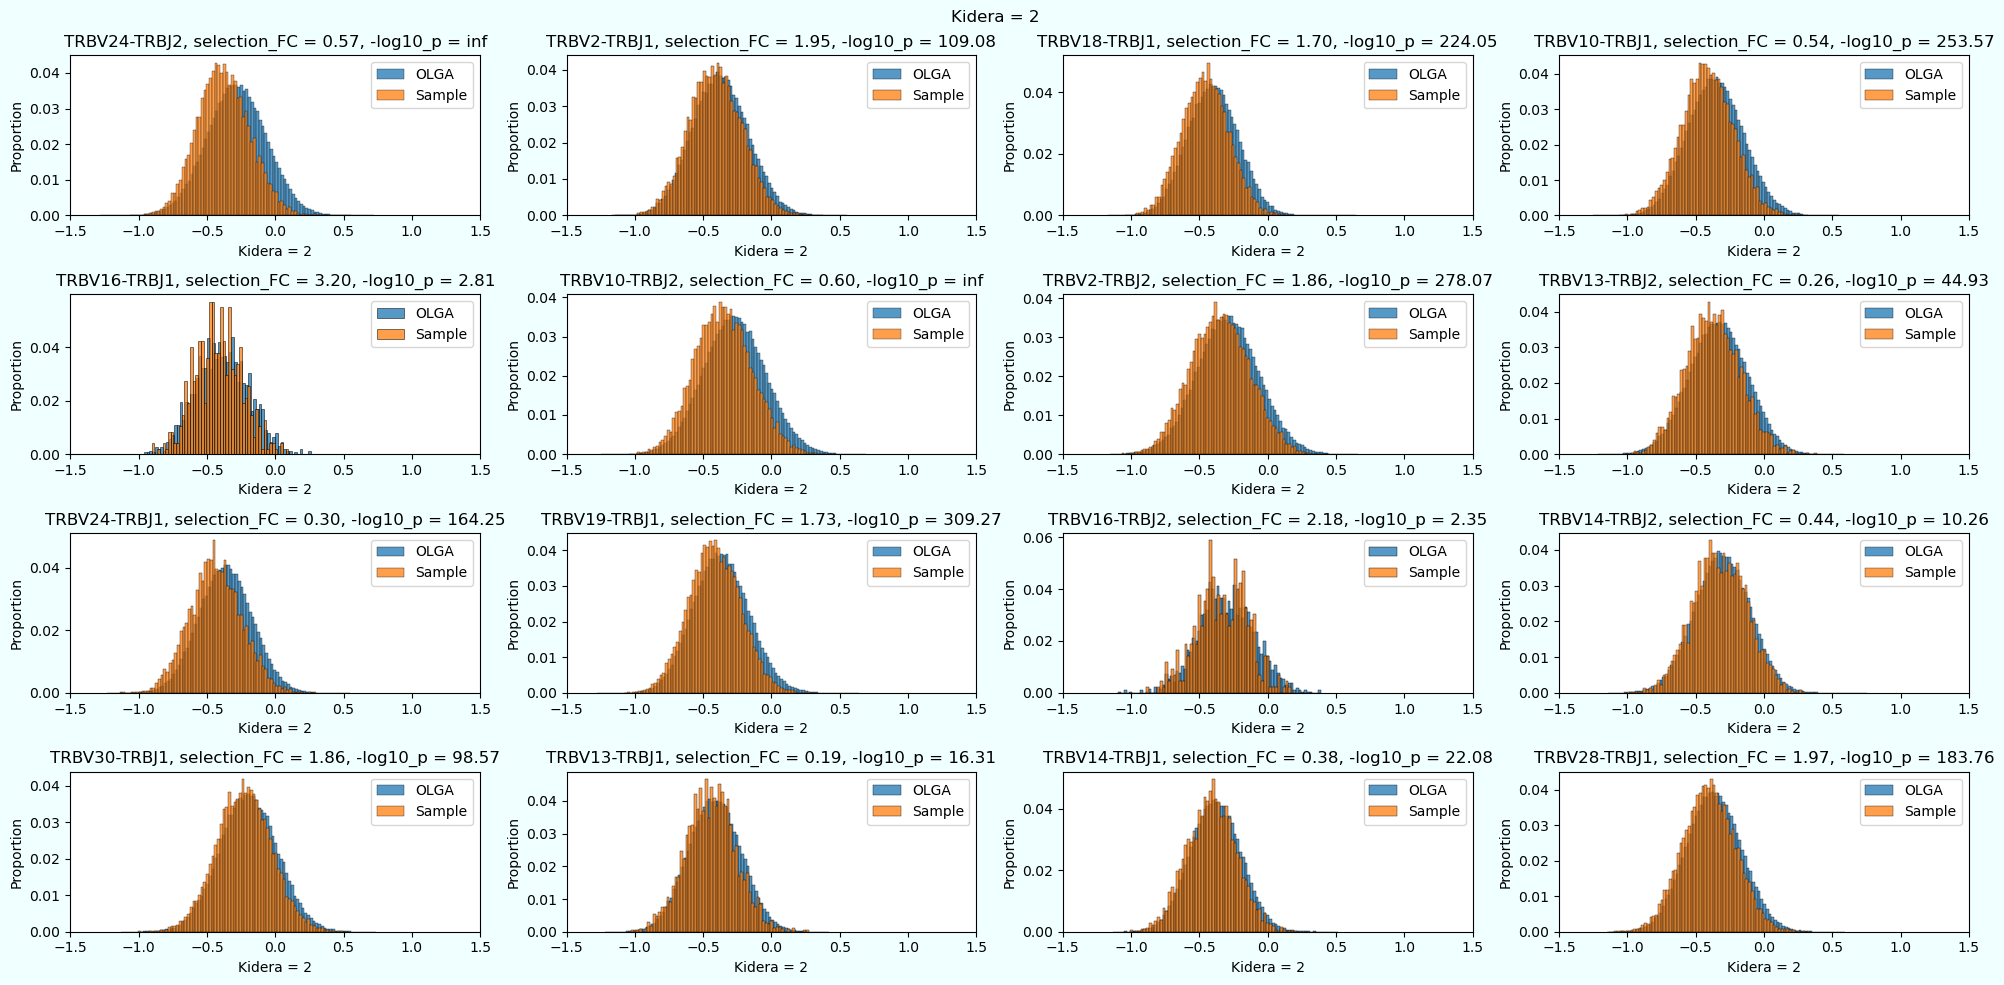

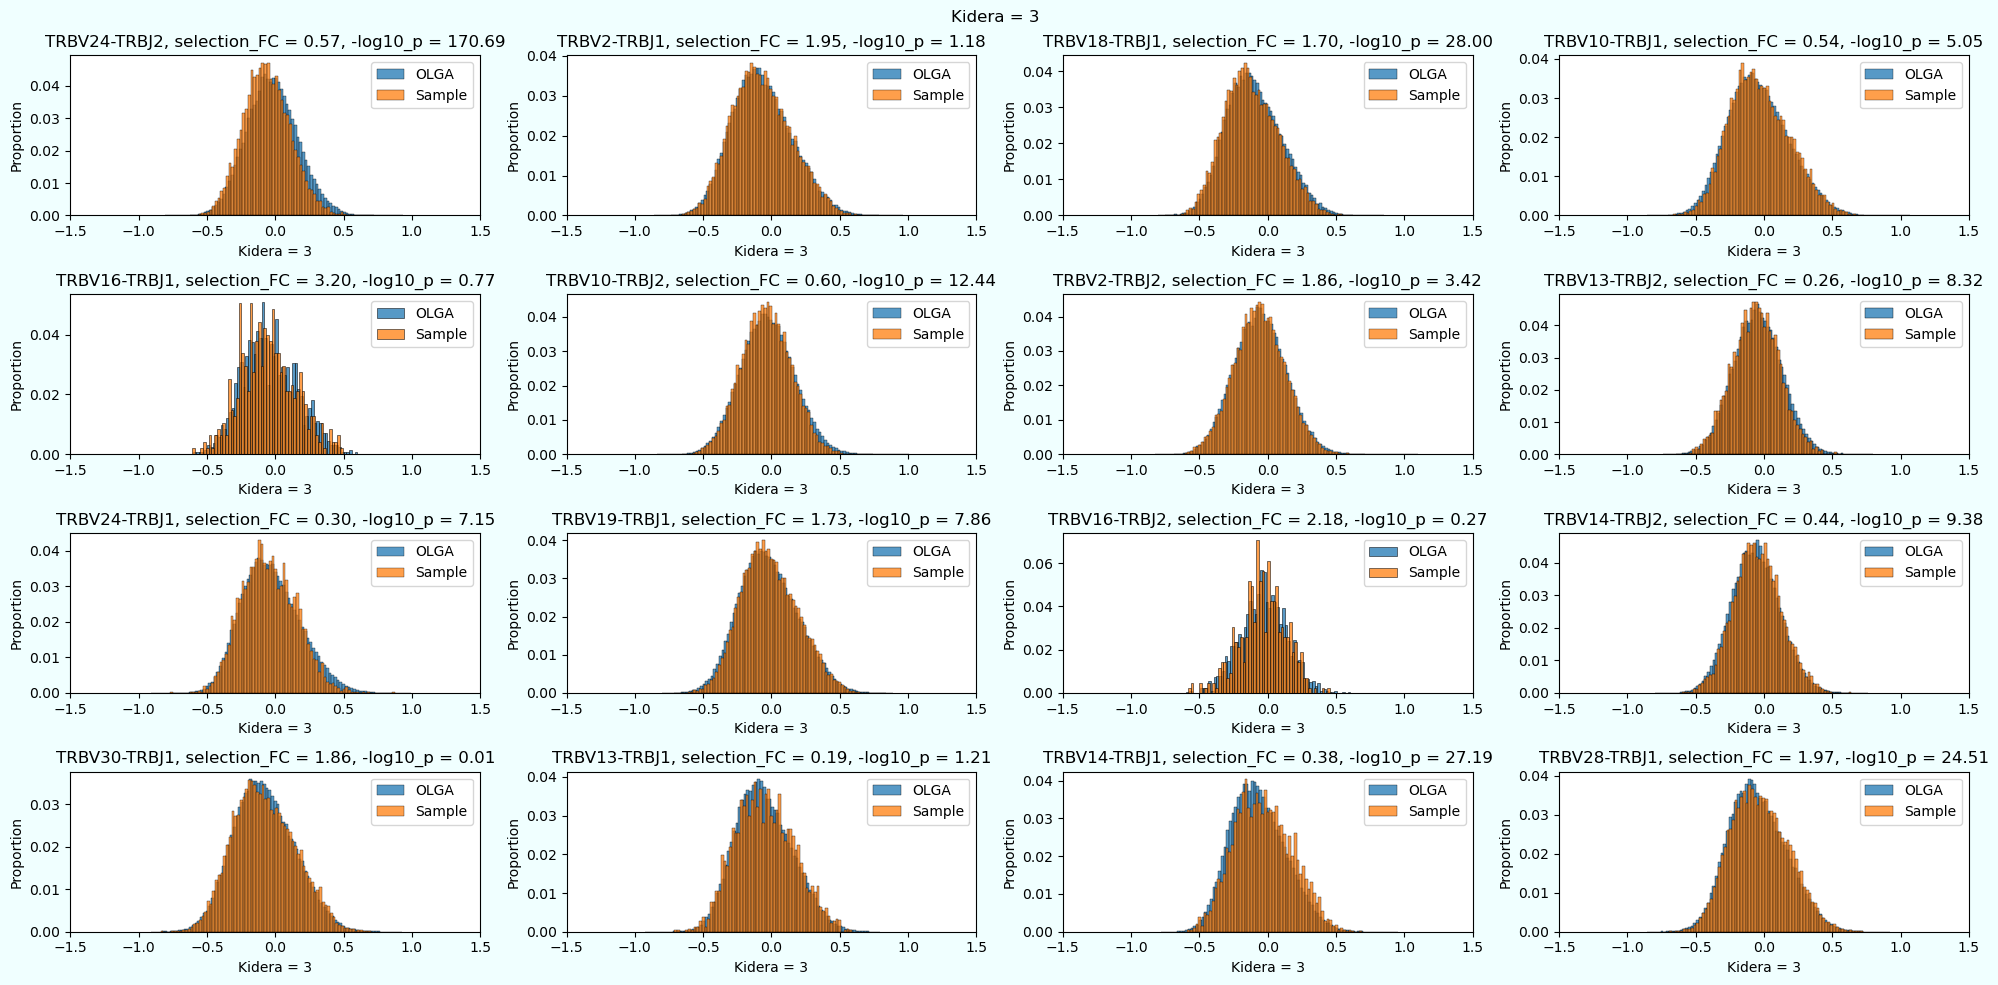

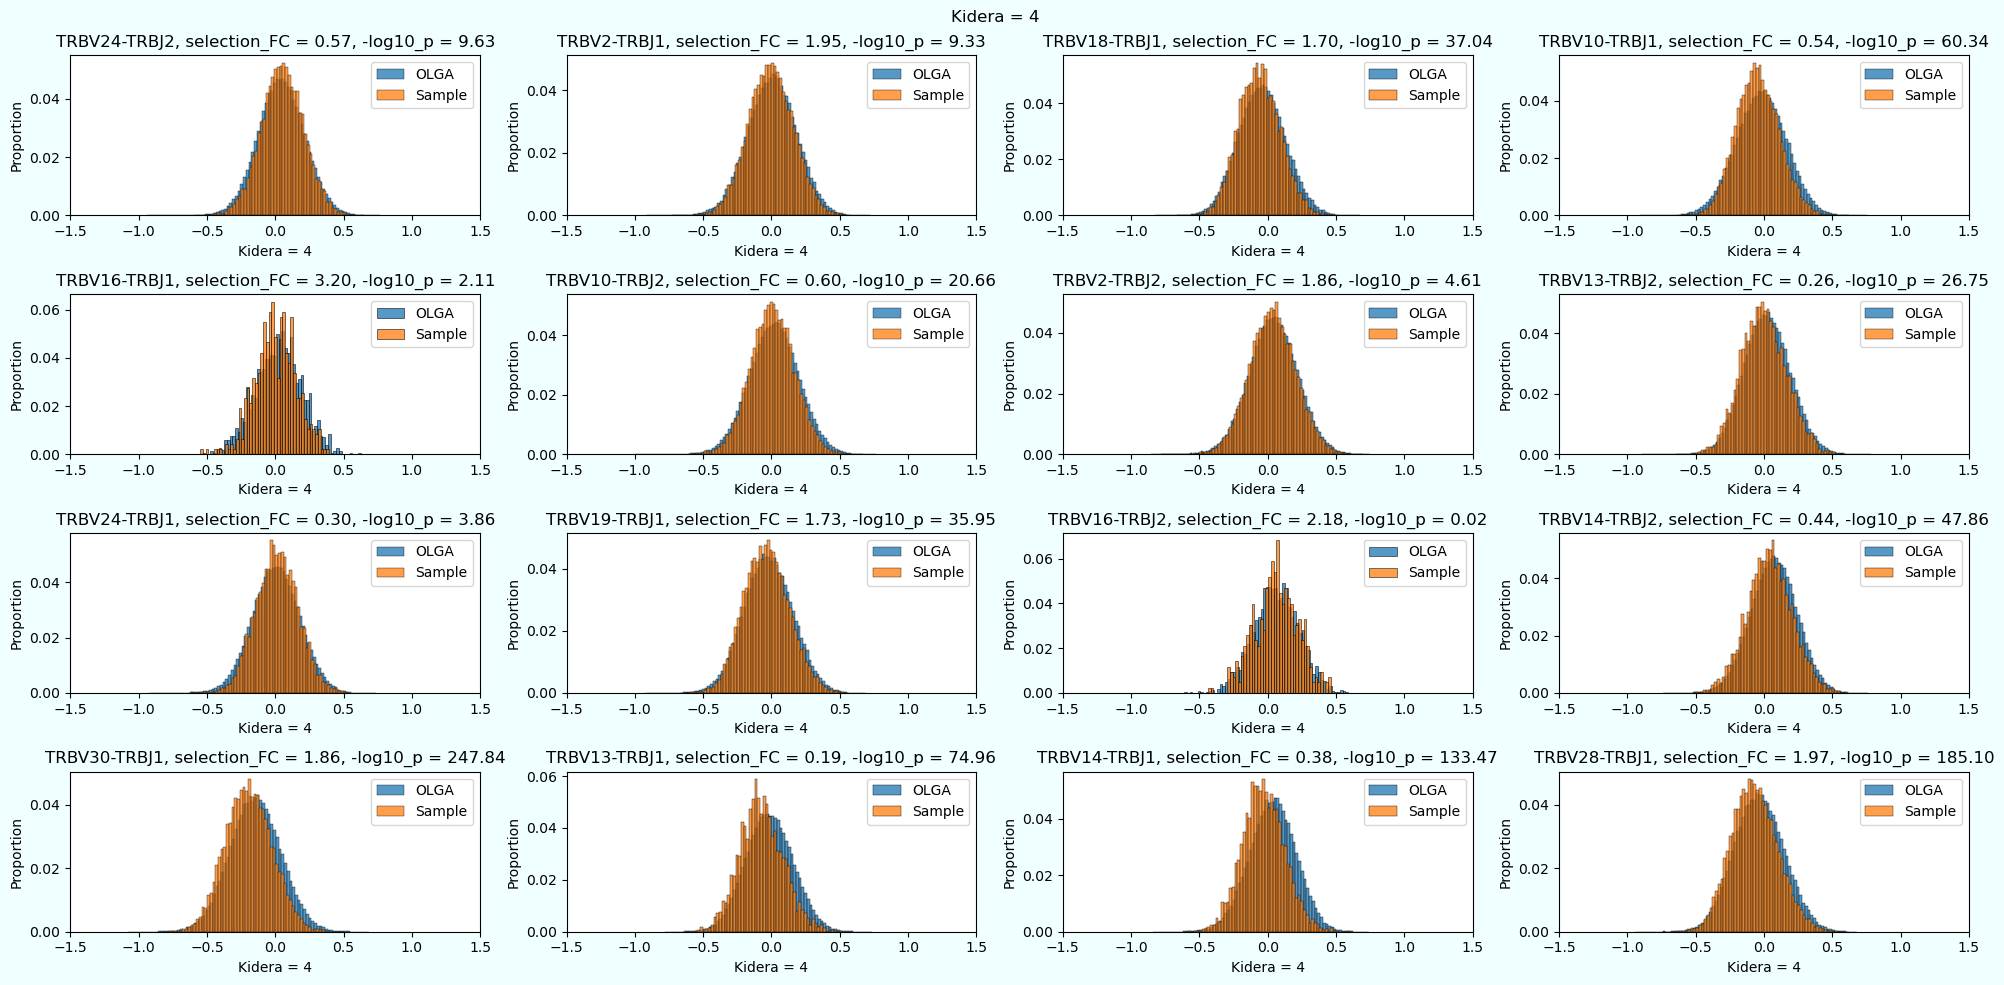

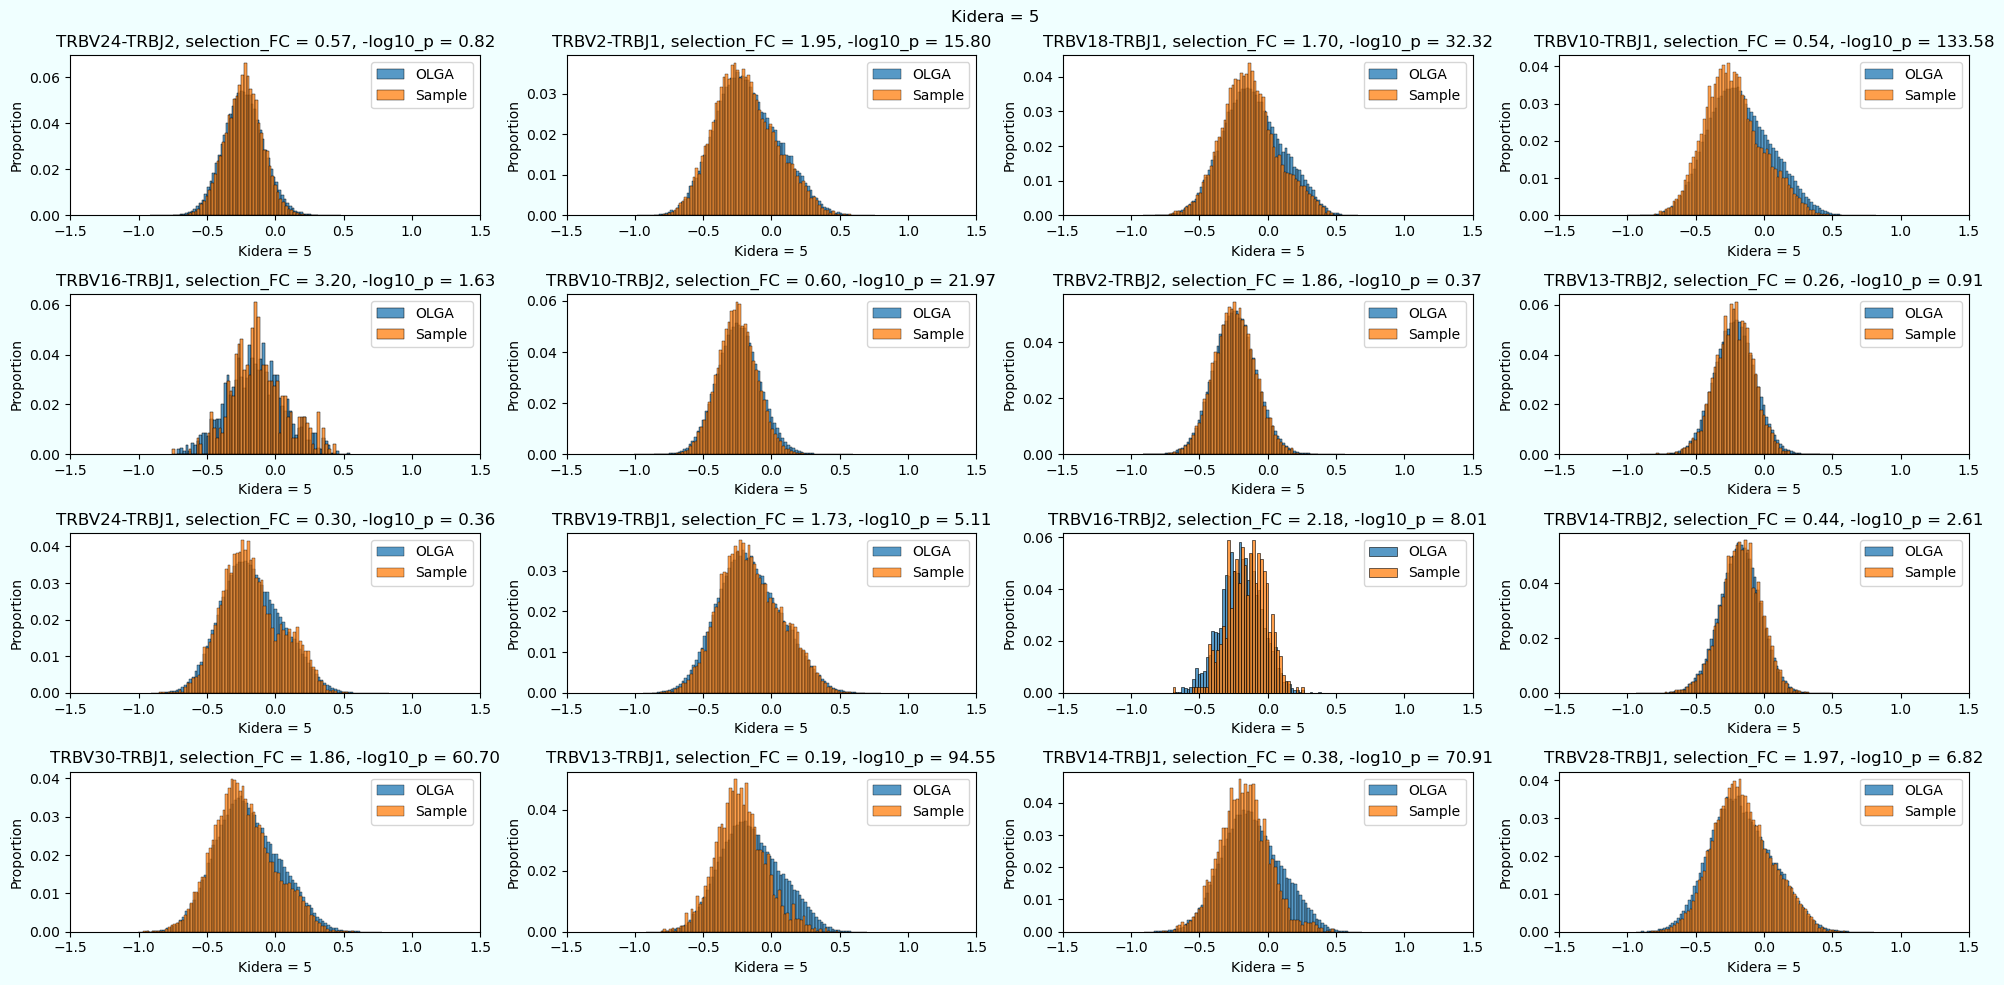

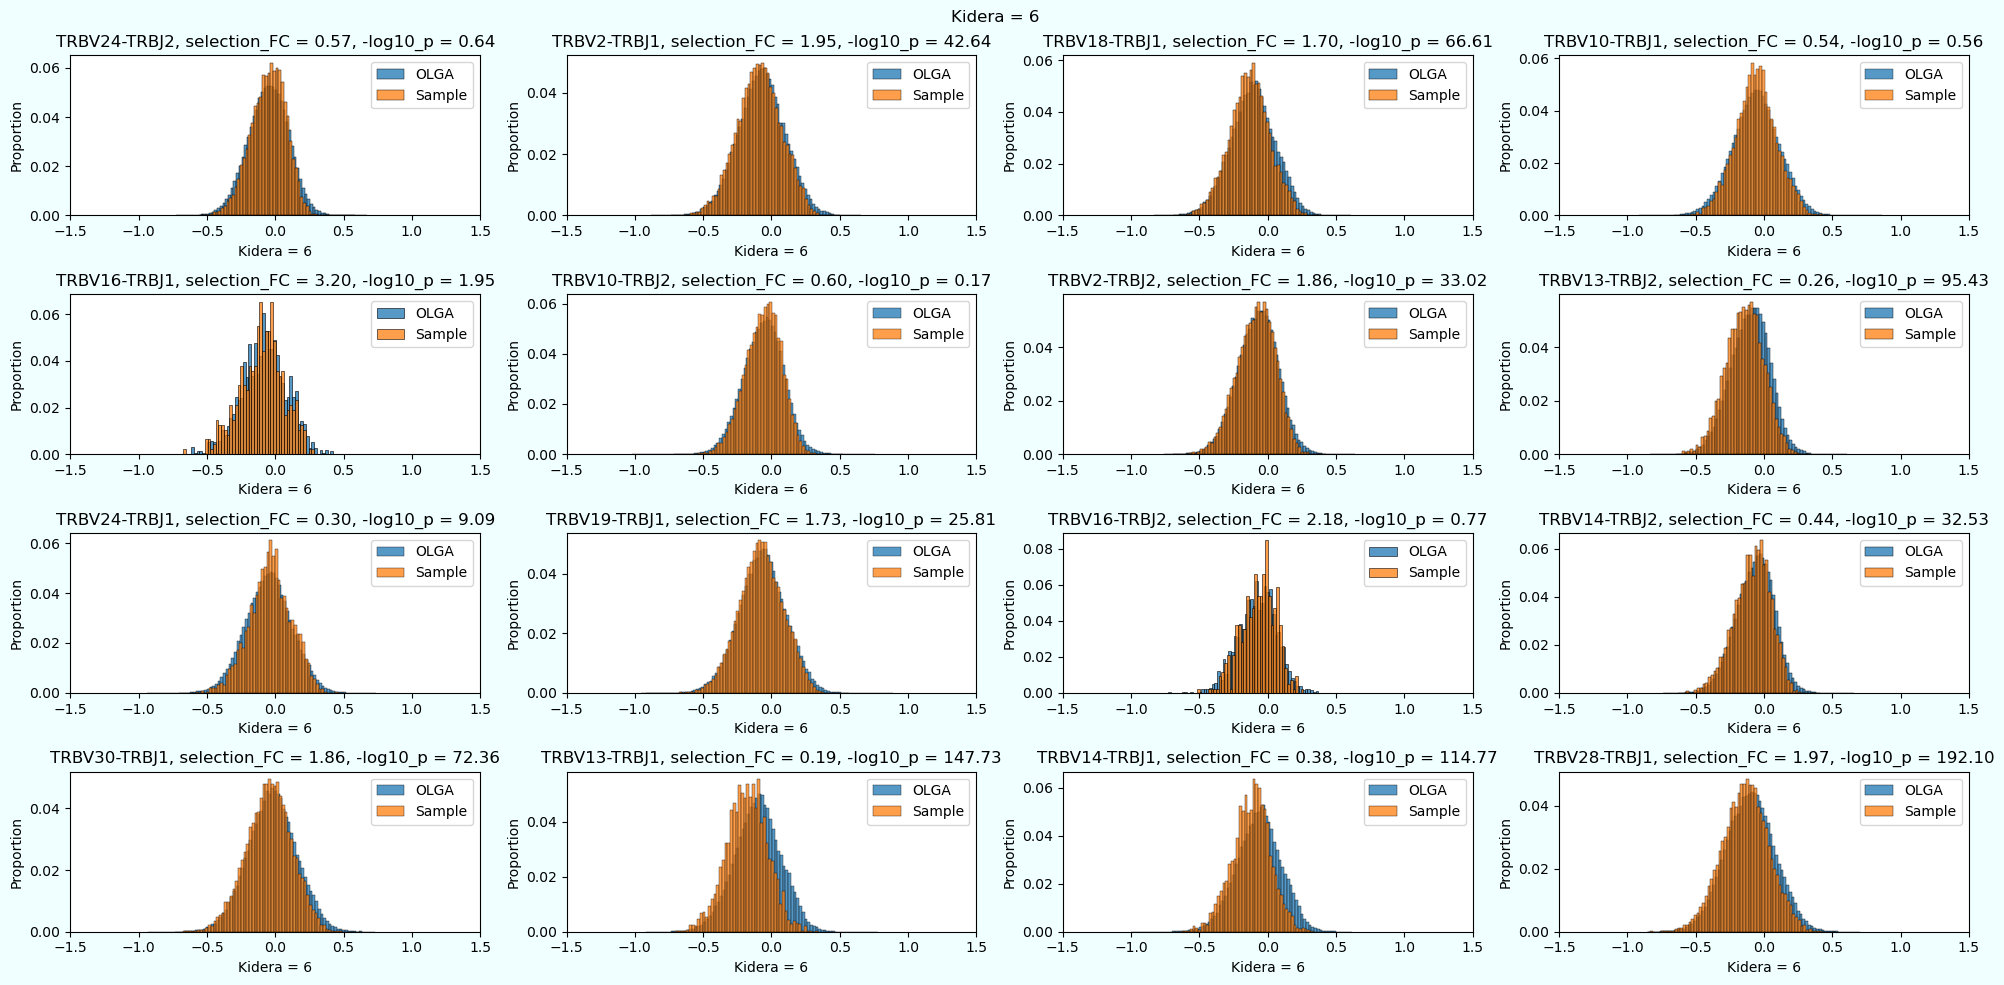

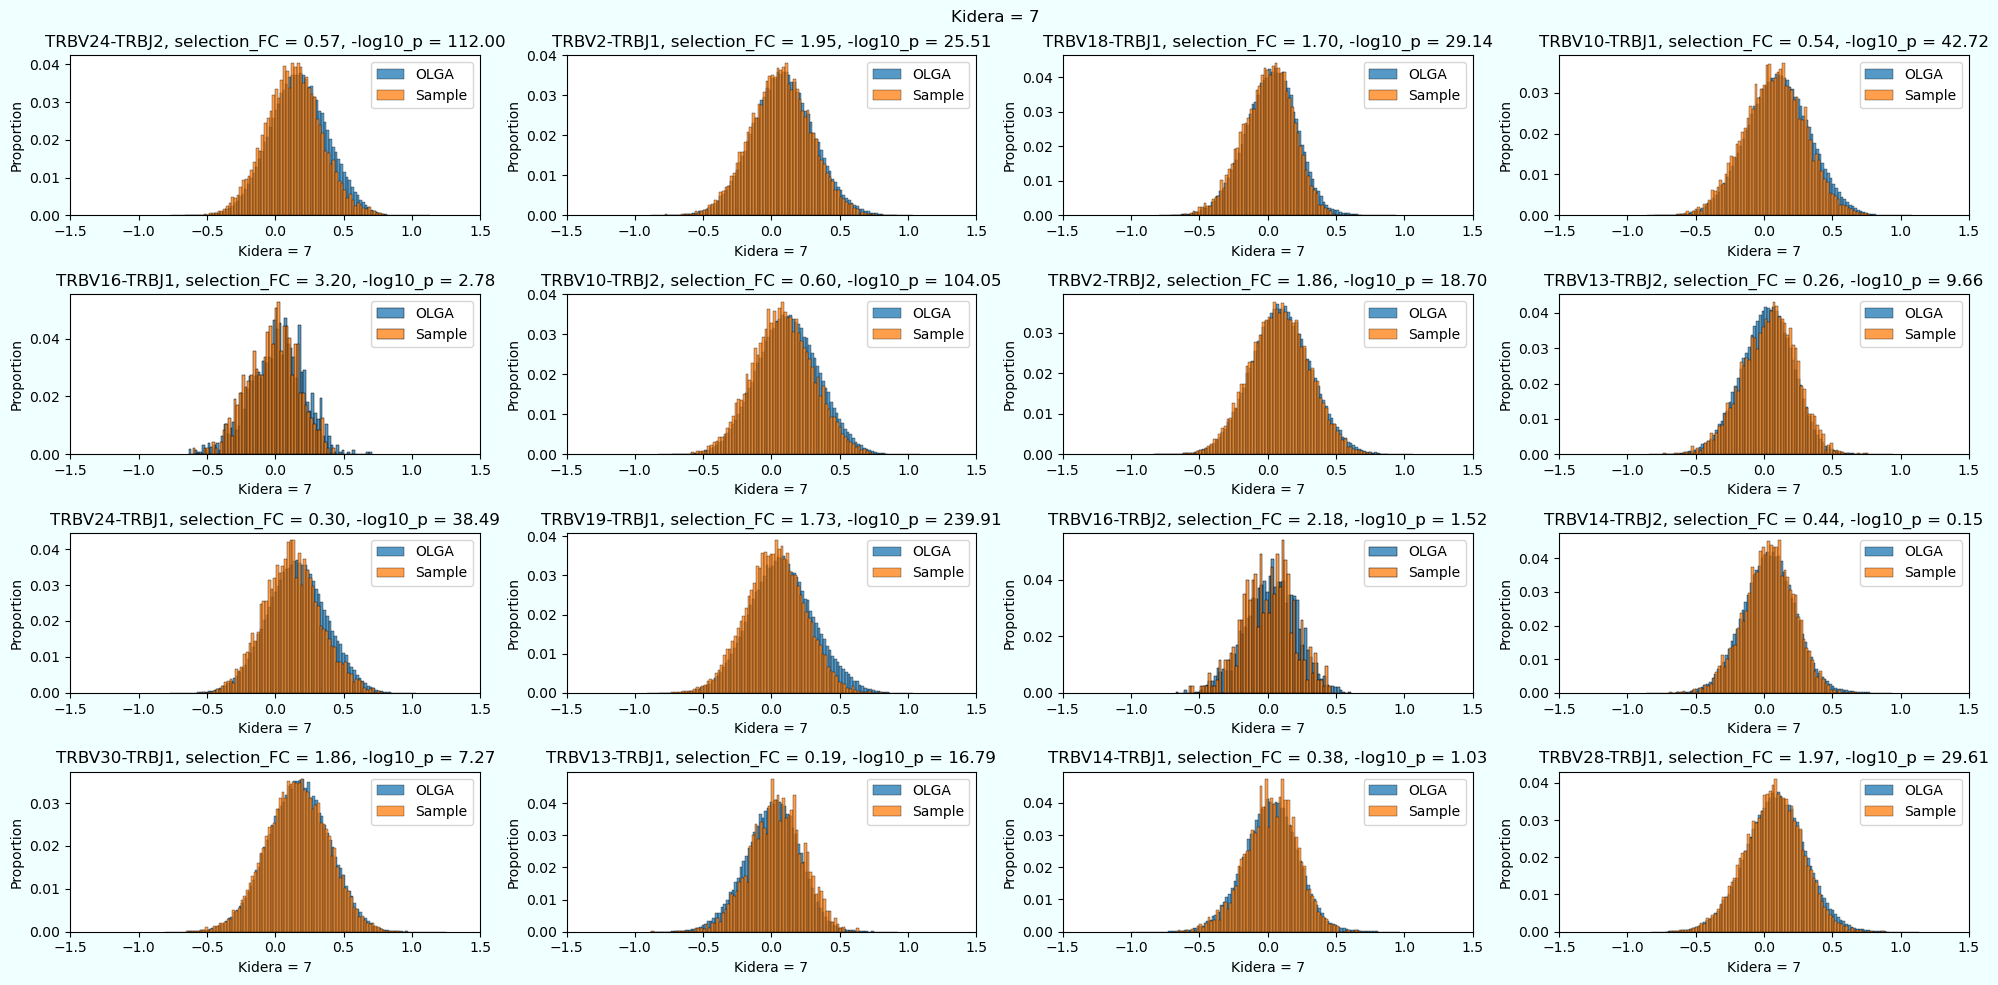

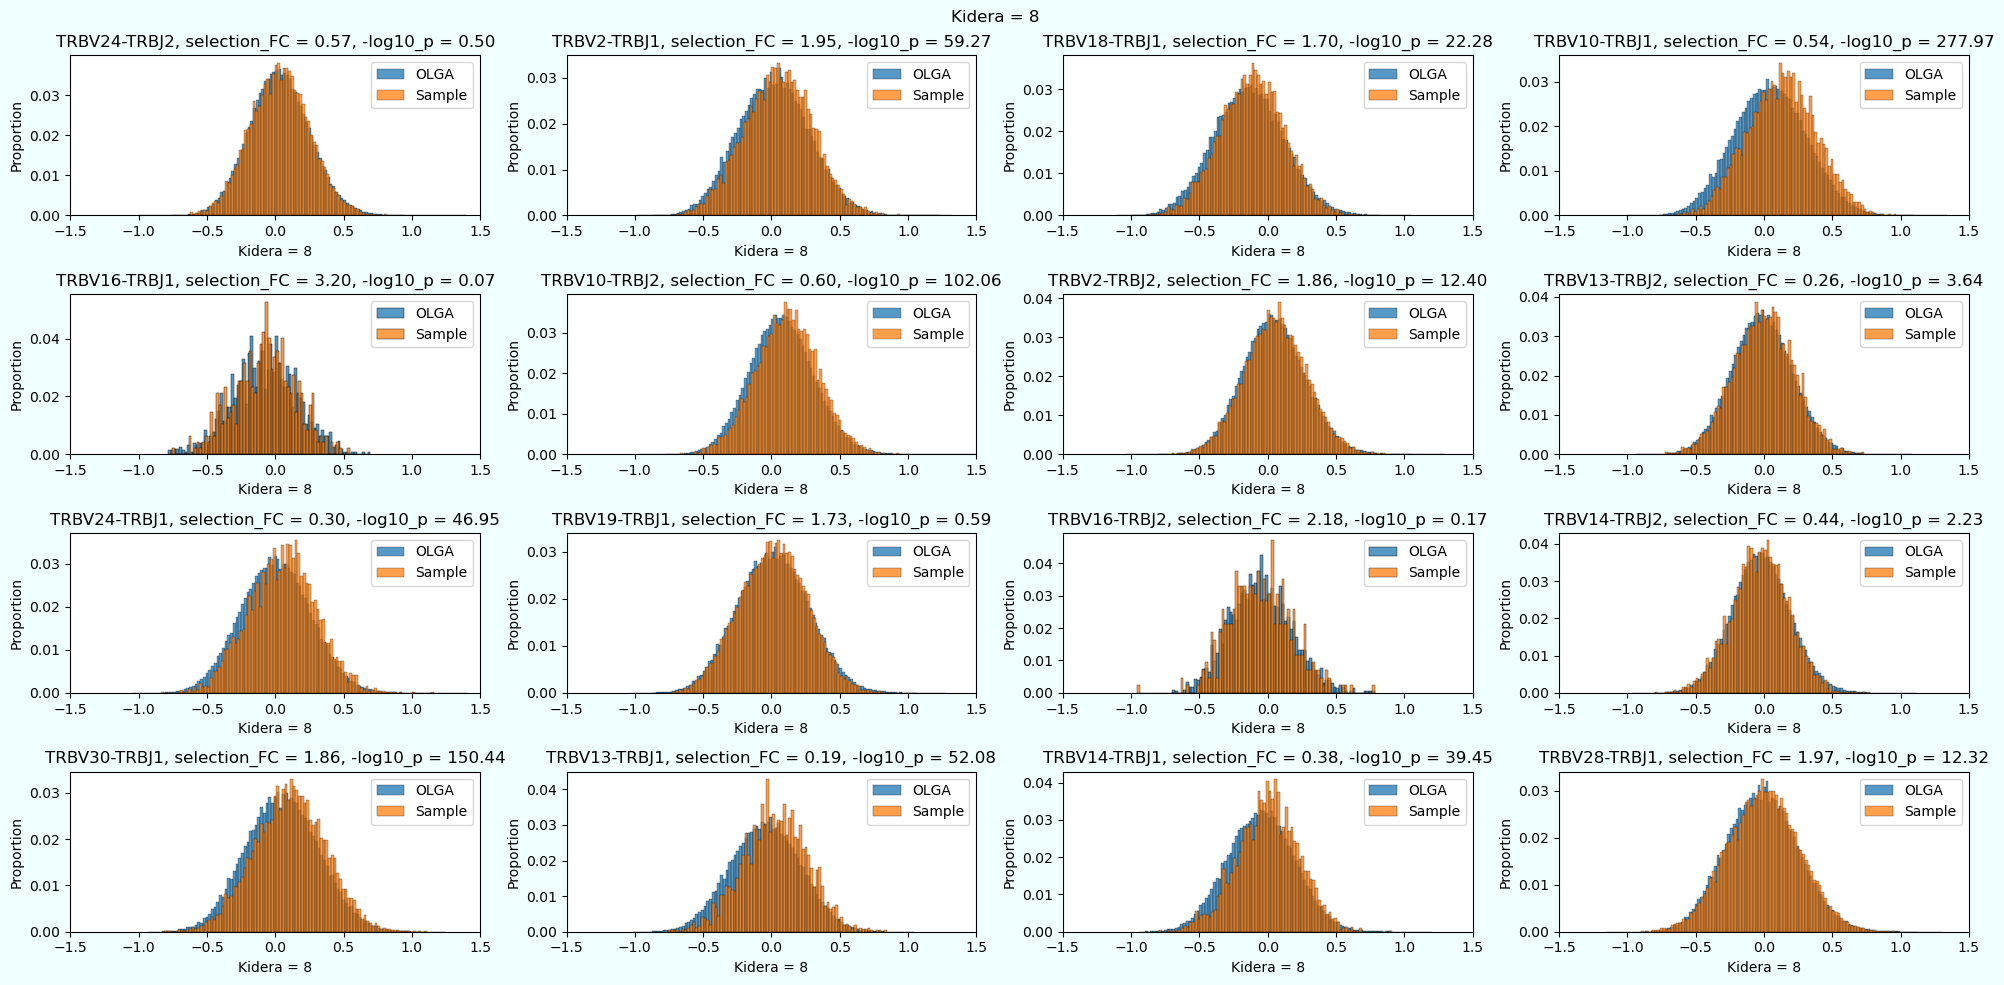

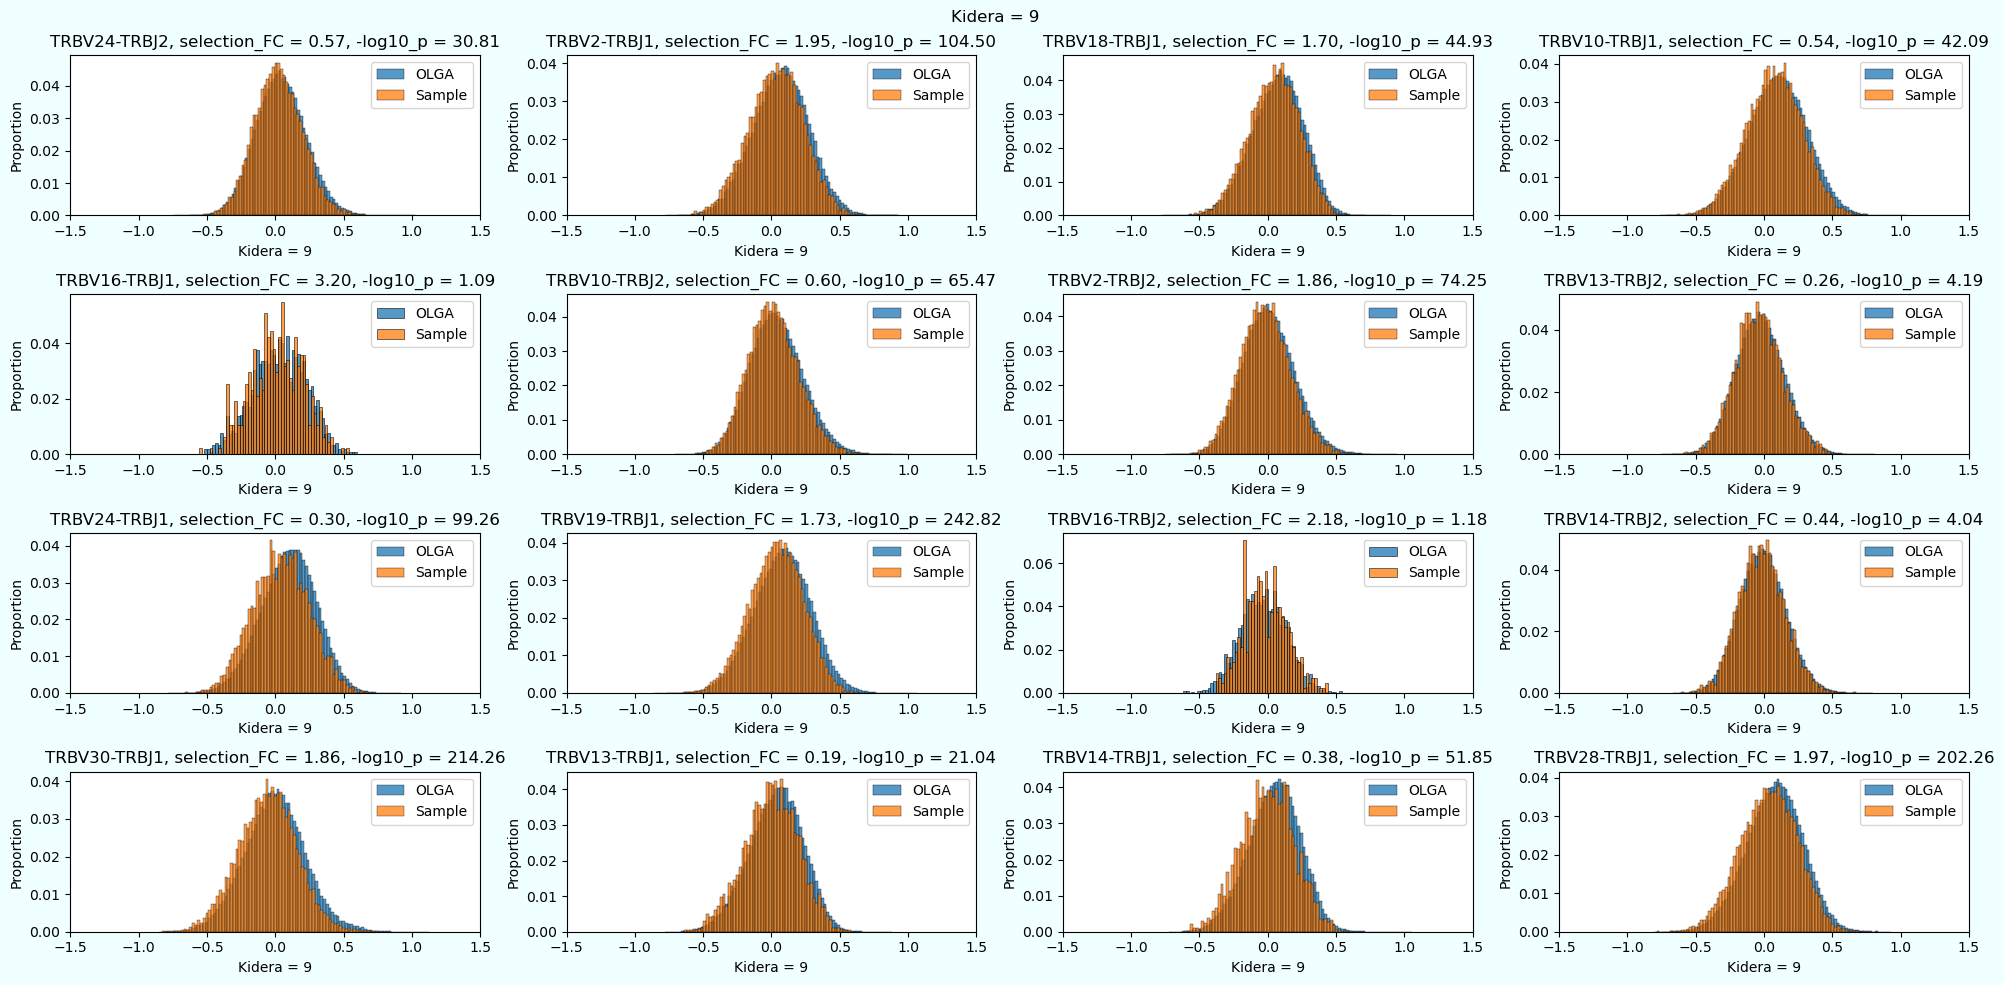

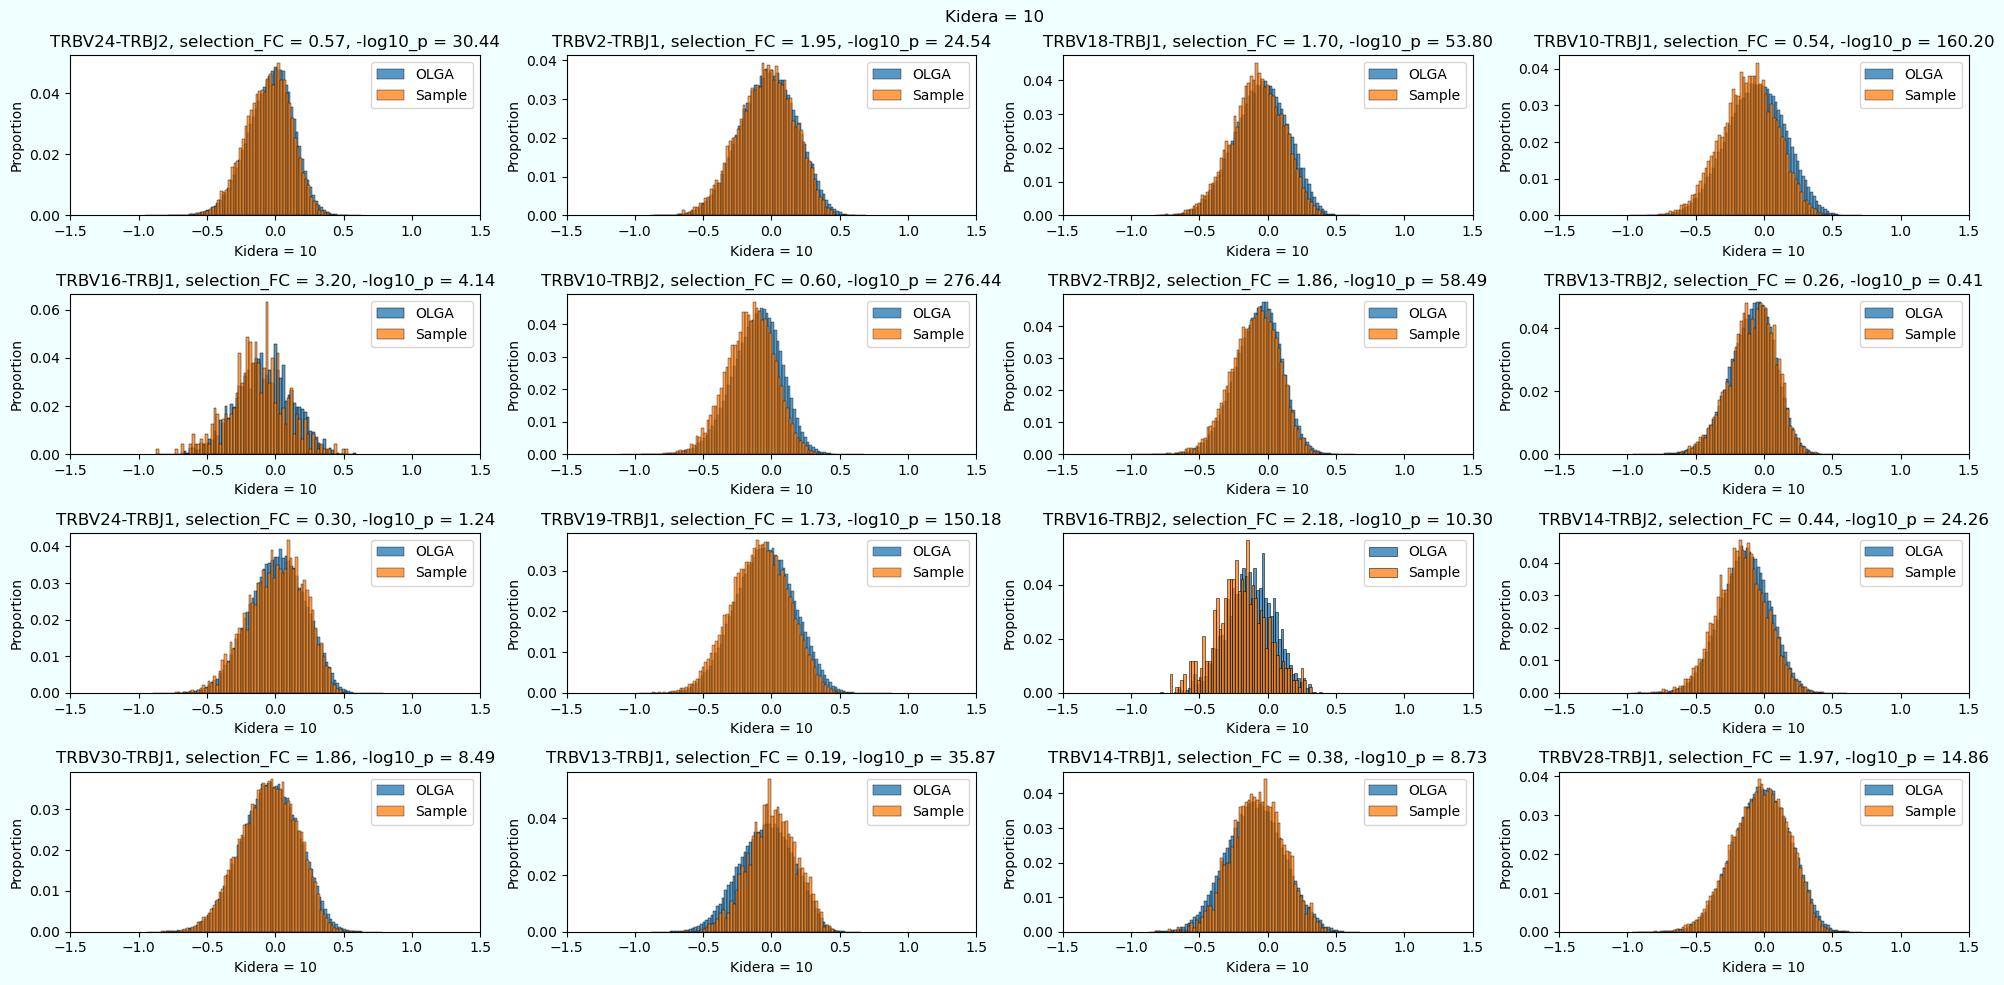

In [41]:
for kidera in range(1, 11):
    
    fig, axs = plt.subplots(4, 4, figsize=(20, 10), facecolor = 'azure')
    for gene, ax in zip(comp_pairs_freq_sign.index, axs.ravel()):
        
#         olga_kidera = pd.DataFrame(kidera_dict[gene]['OLGA'])['aa'].apply(lambda x: x[kidera-1])
#         sample_kidera = pd.DataFrame(kidera_dict[gene]['Sample'])['cdr3aa'].apply(lambda x: x[kidera-1])
        olga_kidera = olga_kid[olga_kid.VJ == gene][str(kidera - 1)]
        sample_kidera = keck_kid[keck_kid.VJ == gene][str(kidera - 1)]
        #ax = axs[i//4, i%4]
        sns.histplot(olga_kidera,
                    binwidth= 0.02 , stat = 'proportion', label = 'OLGA', ax=ax)
        sns.histplot(sample_kidera,
                    binwidth= 0.02 , stat = 'proportion', label = 'Sample', ax = ax)

        selection = 'Positive' if comp_pairs_freq_sign[gene] > 1 else 'Negative'
        log10_pval = -np.log10(scp.stats.ttest_ind(sample_kidera, olga_kidera, equal_var = False).pvalue)
        ax.set_title(f'{gene}, selection_FC = {comp_pairs_freq_sign[gene]:.2f}, -log10_p = {log10_pval:.2f}')
        ax.legend()
        ax.set_xlim([-1.5, 1.5])
        ax.set_xlabel(f'Kidera = {kidera}')
    fig.suptitle(f'Kidera = {kidera}')
    fig.tight_layout()
    plt.show()

# Inpairs scaling

In [45]:
keck_raw = pd.read_csv('/home/dluppov/keck_charge_hydrophobicity.csv', index_col=0)
olga_trb = pd.read_csv('/home/dluppov/olga_trb_charge_hydrophobicity.csv', index_col=0)

olga_trb.V_gene = olga_trb.V_gene.apply(lambda x: x.split('-')[0])
olga_trb.J_gene = olga_trb.J_gene.apply(lambda x: x.split('-')[0])
olga_trb.insert(4, 'VJ', olga_trb.V_gene + '-' + olga_trb.J_gene)


keck_raw.v = keck_raw.v.apply(lambda x: x.split(',')[0].split('-')[0])
keck_raw.j = keck_raw.j.apply(lambda x: x.split(',')[0].split('-')[0])

keck_raw.insert(3, 'VJ', keck_raw.v + '-' + keck_raw.j)
keck_vj_freq = keck_raw.VJ.value_counts()
olga_trb_vj_freq = olga_trb.VJ.value_counts()

common_pairs = list(set(olga_trb_vj_freq.index).intersection(set(keck_vj_freq.index)))

olga_trb_vj_freq = olga_trb_vj_freq[common_pairs]
keck_vj_freq = keck_vj_freq[common_pairs]

In [48]:
keck_raw.index = ['keck' for _ in range(len(keck_raw))]

In [49]:
olga_trb.index = ['olga' for _ in range(len(olga_trb))]

In [51]:
olga_trb.rename(columns = {'aa.1': 'hydrophobicity'}, inplace=True)
keck_raw.rename(columns = {'cdr3aa.1': 'hydrophobicity'}, inplace=True)

In [58]:
scaled_all = pd.concat([keck_raw[['VJ', 'charge']], olga_trb[['VJ', 'charge']]])

In [59]:
#scaled_all.groupby('VJ').charge.apply(lambda x: (x - x.mean())/x.std())
Mean=scaled_all.groupby("VJ").charge.transform('mean')    
Std=scaled_all.groupby("VJ").charge.transform('std')
scaled_all = (scaled_all.charge - Mean) / Std
scaled_all

keck   -0.311476
keck    1.321745
keck   -0.018145
keck   -0.910746
keck   -0.532606
          ...   
olga    1.250588
olga   -0.857948
olga   -0.803812
olga    0.534493
olga    1.272924
Name: charge, Length: 10964889, dtype: float64

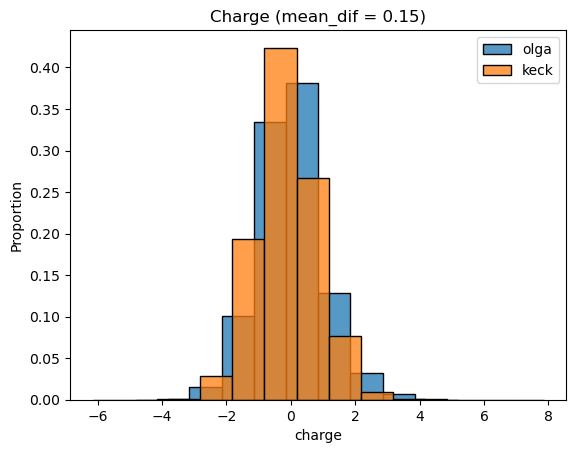

In [60]:
#sns.histplot(scaled_all, binwidth= 1, label = 'all', stat = 'proportion')
sns.histplot(scaled_all['olga'], binwidth= 1,label = 'olga', stat = 'proportion')
sns.histplot(scaled_all['keck'], binwidth= 1,label = 'keck', stat = 'proportion')
plt.legend()
mean_dif = scaled_all["olga"].mean() - scaled_all["keck"].mean()
plt.title(f'Charge (mean_dif = {mean_dif:.2f})')
plt.show()

In [61]:
scaled_all = pd.concat([keck_raw[['VJ', 'hydrophobicity']], olga_trb[['VJ', 'hydrophobicity']]])

Mean=scaled_all.groupby("VJ").hydrophobicity.transform('mean')    
Std=scaled_all.groupby("VJ").hydrophobicity.transform('std')
scaled_all = (scaled_all.hydrophobicity - Mean) / Std
scaled_all

keck    1.407276
keck   -0.228149
keck    2.222943
keck    0.410036
keck    0.851109
          ...   
olga    0.673310
olga   -1.413699
olga    0.332813
olga   -1.609512
olga    0.028692
Name: hydrophobicity, Length: 10964889, dtype: float64

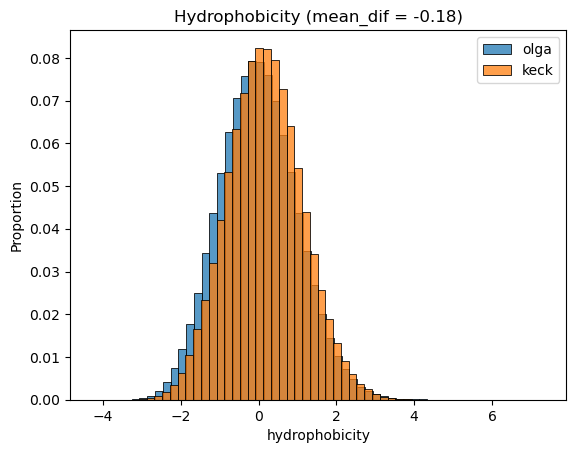

In [62]:
sns.histplot(scaled_all['olga'], binwidth= 0.2,label = 'olga', stat = 'proportion')
sns.histplot(scaled_all['keck'], binwidth= 0.2,label = 'keck', stat = 'proportion')
plt.legend()
mean_dif = scaled_all["olga"].mean() - scaled_all["keck"].mean()
plt.title(f'Hydrophobicity (mean_dif = {mean_dif:.2f})')
plt.show()

In [12]:
def kidera_series(x):
    return pd.Series(peptides.Peptide(x).kidera_factors())

In [94]:
keck_all_kideras = keck_raw.cdr3aa.apply(lambda x: kidera_series(x))
keck_all_kideras

0         1         2         3         4         5         6  \
keck -0.560000 -0.758571 -0.578571 -0.128571 -0.400000 -0.162143  0.262857   
keck -0.341538 -0.338462 -0.072308  0.201538 -0.337692 -0.169231  0.226923   
keck -0.400833 -0.629167 -0.471667 -0.416667 -0.237500 -0.426667 -0.018333   
keck -0.433077 -0.541538 -0.532308 -0.102308  0.103846  0.112308 -0.125385   
keck -0.311818 -0.320909 -0.443636 -0.287273 -0.321818 -0.212727  0.177273   
...        ...       ...       ...       ...       ...       ...       ...   
keck  0.437500 -0.135833  0.037500 -0.001667 -0.201667 -0.277500  0.559167   
keck  0.461667  0.176667 -0.042500 -0.050000  0.285833 -0.100833  0.450833   
keck  0.721538 -0.314615  0.070000 -0.231538 -0.128462 -0.134615  0.082308   
keck  0.428333 -0.132500  0.175833  0.149167 -0.091667  0.180000  0.700833   
keck  0.031818  0.540909  0.242727 -0.205455 -0.362727 -0.000909  0.119091   

             7         8         9  
keck  0.394286  0.426429 -0.579286  
keck -0.145385  0.230000 -0.034615  
keck -0.265000  0.548333 -0.000833  
keck -0.286923  0.308462 -0.294615  
keck -0.043636  0.358182 -0.266364  
...        ...       ...       ...  
keck  0.629167 -0.280000  0.434167  
keck  0.120833  0.265833 -0.142500  
keck  0.220000 -0.077692  0.250769  
keck  0.580833 -0.248333 -0.046667  
keck  0.214545 -0.000909  0.027273  

[964889 rows x 10 columns]

In [111]:
pd.concat([keck_raw[["VJ", "cdr3aa"]], keck_all_kideras], axis = 1).to_csv('keck_all_kideras.csv')

In [13]:
olga_trb_all_kideras = olga_trb.aa.apply(lambda x: kidera_series(x))
olga_trb_all_kideras

0         1         2         3         4         5         6  \
olga  0.231538 -0.750000  0.158462 -0.112308 -0.349231 -0.276154  0.422308   
olga  0.143333  0.212222 -0.146667  0.383333 -0.186667  0.087778  0.514444   
olga -0.210000 -0.388333 -0.056667 -0.213333 -0.395000 -0.208333  0.046667   
olga  0.192000  0.008667  0.075333  0.320000 -0.364667  0.162667  0.344667   
olga -0.229524 -0.433333 -0.096190  0.028095 -0.368571 -0.266190  0.381429   
...        ...       ...       ...       ...       ...       ...       ...   
olga  0.188235 -0.237059  0.235882  0.016471 -0.341765 -0.214118  0.032353   
olga  0.250667 -0.255333 -0.290000  0.120000 -0.332000  0.033333  0.374667   
olga  0.259286 -0.678571 -0.341429 -0.089286 -0.028571 -0.100000 -0.007857   
olga  0.052500 -0.078125 -0.030000  0.470000 -0.756875  0.113125  0.170000   
olga  0.356316 -0.118421  0.132632 -0.023684 -0.290526 -0.123158  0.072632   

             7         8         9  
olga  0.069231 -0.296923  0.328462  
olga  0.385556  0.140000  0.158889  
olga  0.213333  0.208333  0.023333  
olga  0.289333  0.331333 -0.149333  
olga -0.098571 -0.069524  0.163810  
...        ...       ...       ...  
olga -0.254706 -0.008235  0.203529  
olga  0.404000 -0.207333  0.023333  
olga -0.045000  0.012857 -0.339286  
olga  0.150000  0.310625  0.184375  
olga -0.588947  0.190526  0.187368  

[10000000 rows x 10 columns]

In [14]:
pd.concat([olga_trb[["VJ", "aa"]], olga_trb_all_kideras], axis = 1).to_csv('OLGA_all_kideras.csv')

In [55]:
olga_kid = pd.read_csv('OLGA_all_kideras.csv', index_col=0)
keck_kid = pd.read_csv('keck_all_kideras.csv', index_col=0)

In [57]:
scaled_all = pd.concat([olga_kid.drop('aa', axis=1), keck_kid.drop('cdr3aa', axis=1)])

Mean=scaled_all.groupby("VJ").transform('mean')    
Std=scaled_all.groupby("VJ").transform('std')
scaled_all = (scaled_all - Mean) / Std
scaled_all

0         1         2         3         4         5         6  \
olga  0.313295 -1.802041  1.050349 -0.412062 -0.862817 -0.828715  1.881262   
olga  0.153293  1.981102 -0.641379  1.784061  0.369356  0.945207  1.785304   
olga -1.330222 -0.296337 -0.102194 -1.207086 -0.871215 -0.894514 -0.424672   
olga  0.585782  1.365318  0.520275  1.613608 -0.895130  1.453083  0.815112   
olga -1.735442 -0.646816 -0.321648  0.149875 -0.963097 -0.994760  1.390309   
...        ...       ...       ...       ...       ...       ...       ...   
keck  1.606532  0.471386  0.328592 -0.302962  0.279563 -1.485806  2.004823   
keck  1.725920  1.826877 -0.092753 -0.564970  3.197836 -0.310046  1.473069   
keck  2.059843  0.057494  0.472319 -1.303842  0.223283 -0.473669 -0.256867   
keck  1.561247  0.485844  1.057168  0.514681  0.938045  1.558968  2.700193   
keck -0.363057  4.145113  1.366189 -1.316143 -1.081268  0.772286  0.496744   

             7         8         9  VJ  
olga  0.417045 -1.742665  1.753034 NaN  
olga  1.386327  0.547619  1.167293 NaN  
olga  0.667359  0.528136  0.088496 NaN  
olga  1.153660  1.587328 -0.682140 NaN  
olga -0.475628 -0.425451  1.380675 NaN  
...        ...       ...       ...  ..  
keck  2.435228 -1.681593  2.720545 NaN  
keck  0.246530  1.215497 -0.533289 NaN  
keck  0.692472 -0.851646  1.152819 NaN  
keck  2.227122 -1.513517  0.007449 NaN  
keck  0.857649  0.188811  0.595357 NaN  

[10964889 rows x 11 columns]

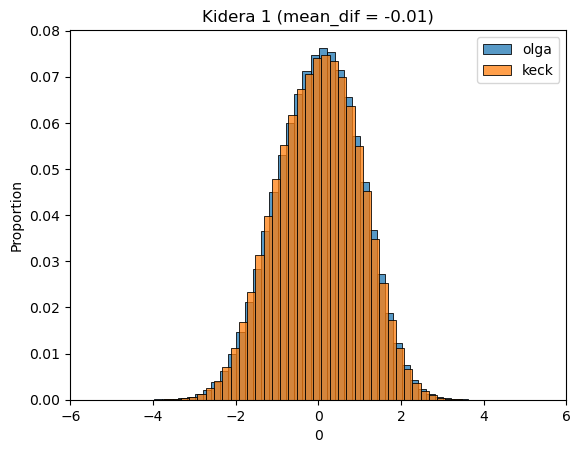

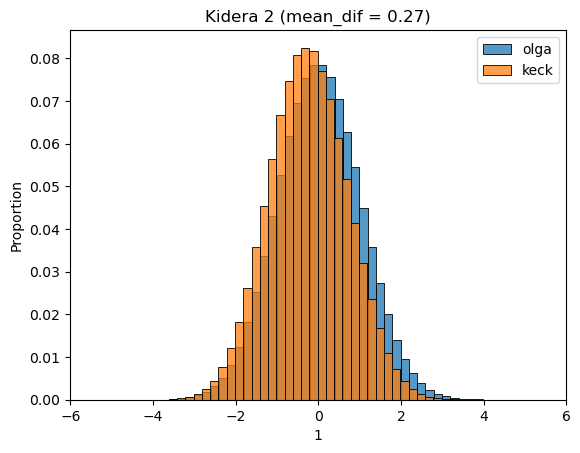

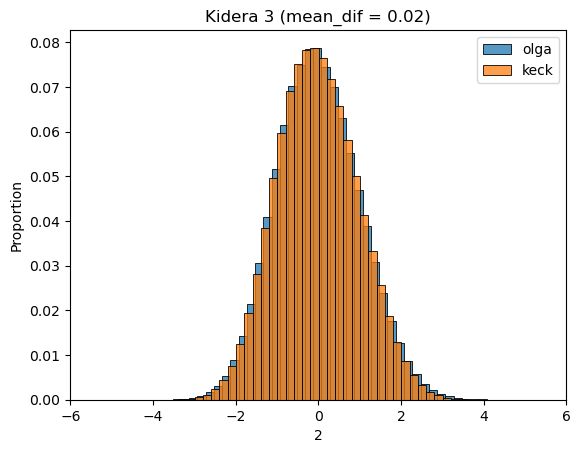

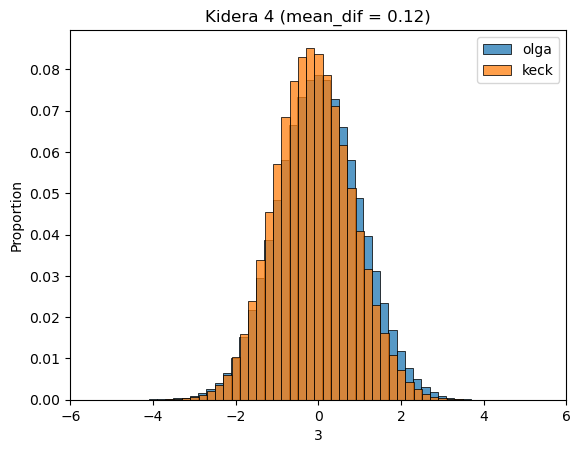

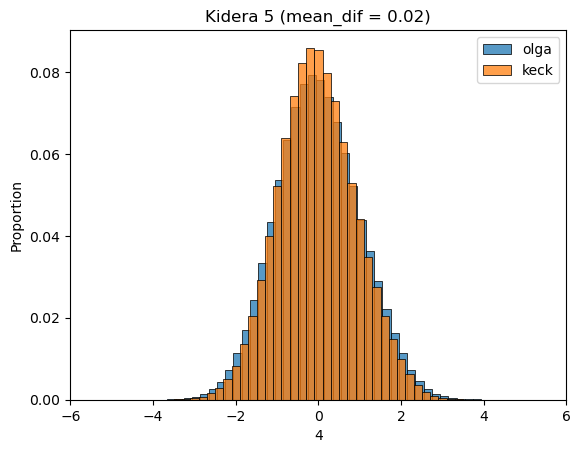

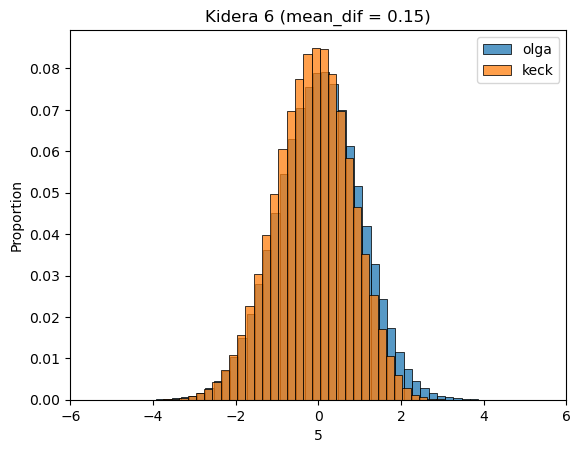

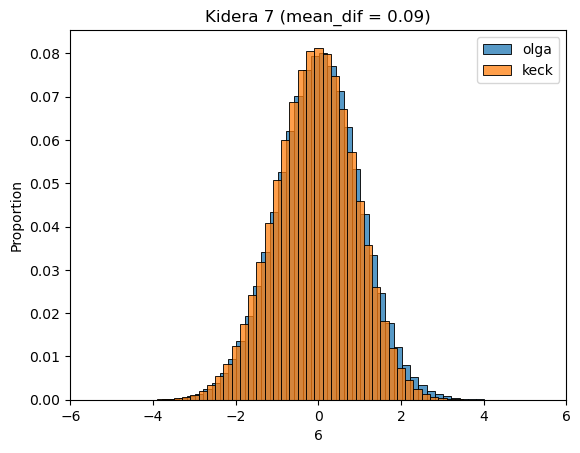

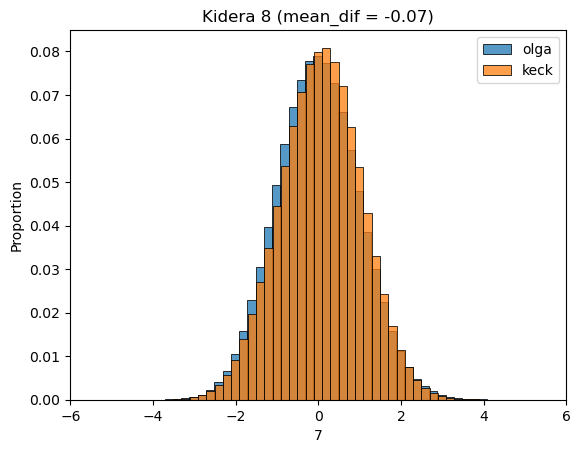

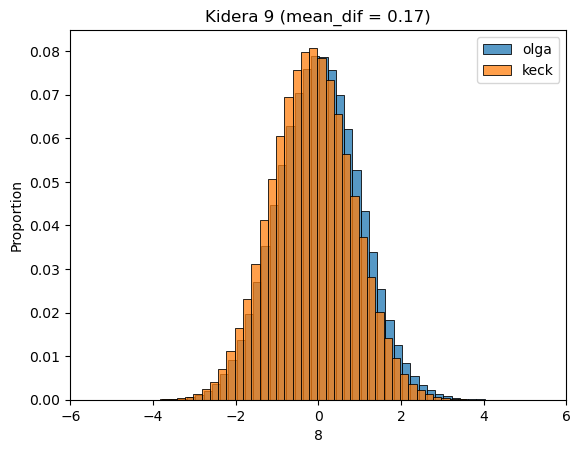

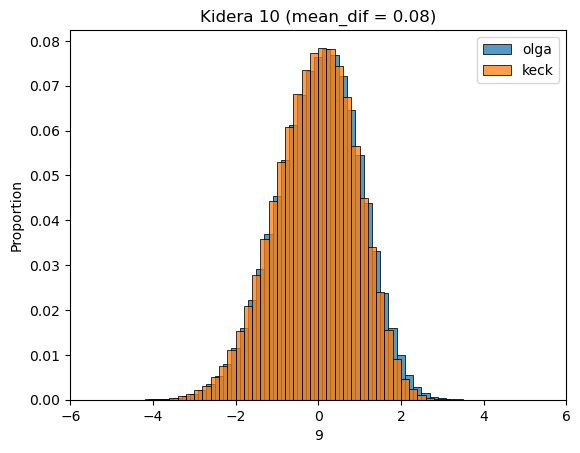

In [60]:
scaled_all = scaled_all.drop('VJ', axis = 1)

for kid_ind in scaled_all.columns:
    
    sns.histplot(scaled_all[kid_ind]['olga'], binwidth= 0.2,label = 'olga', stat = 'proportion')
    sns.histplot(scaled_all[kid_ind]['keck'], binwidth= 0.2,label = 'keck', stat = 'proportion')
    plt.legend()
    mean_dif = scaled_all[kid_ind]['olga'].mean() - scaled_all[kid_ind]['keck'].mean()
    plt.title(f'Kidera {int(kid_ind)+ 1} (mean_dif = {mean_dif:.2f})')
    plt.xlim([-6, 6])
    plt.show()

# KIDERA Volcano

In [64]:
olga_kid = pd.read_csv('/home/dluppov/OLGA_all_kideras.csv', index_col=0)
keck_kid = pd.read_csv('/home/dluppov/keck_all_kideras.csv', index_col=0)

In [68]:
def cohens_d(x, y):
    
    n1 = len(x)
    n2 = len(y)
    s1 = x.std()
    s2 = y.std()
    s = (((n1-1)*s1**2+(n2-1)*s2**2)/(n1+n2-2))**(1/2)
    
    return (x.mean() - y.mean())/s

In [65]:
common_vj = list(set(keck_kid.VJ).intersection(set(olga_kid.VJ)))
len(common_vj)

46

In [69]:
#for each gene pair and for each KF we will calculate p_val and fold change to plot it on Volcano plot
#along with selection fraction 

import tqdm

volcano_list = []

for vj in tqdm.tqdm(common_vj):
    
    for kidera in range(0, 10):
        
        p_val = scp.stats.ttest_ind(olga_kid[olga_kid.VJ == vj][str(kidera)],
                            keck_kid[keck_kid.VJ == vj][str(kidera)], equal_var=False).pvalue
        
        logfc = np.log2(keck_kid[keck_kid.VJ == vj][str(kidera)].mean()/olga_kid[olga_kid.VJ == vj][str(kidera)].mean())
        
        selection = np.log2(comp_pairs_freq[vj])
        
        cohens_d_i = cohens_d(keck_kid[keck_kid.VJ == vj][str(kidera)],
                             olga_kid[olga_kid.VJ == vj][str(kidera)])
        
        volcano_list.append({
            'vj': vj,
            'kidera': kidera,
            "p_val": p_val,
            'logfc': logfc,
            'cohens_d': cohens_d_i,
            "selection": selection
        })

  0%|                                                    | 0/46 [00:00<?, ?it/s]/home/dluppov/.conda-envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log2
  if sys.path[0] == "":
100%|███████████████████████████████████████████| 46/46 [18:18<00:00, 23.89s/it]


In [70]:
res_df = pd.DataFrame(volcano_list)
res_df.insert(0, 'vj_kidera', res_df.vj+ '-kidera_' + res_df.kidera.apply(lambda x: str(x+1)))
res_df.insert(0, 'logp_val', -res_df.p_val.apply(lambda x: np.log10(x) if x > 10**(-200) else np.log10(10**(-200))))
res_df

logp_val               vj_kidera            vj  kidera          p_val  \
0      3.976069   TRBV11-TRBJ1-kidera_1  TRBV11-TRBJ1       0   1.056650e-04   
1    155.341055   TRBV11-TRBJ1-kidera_2  TRBV11-TRBJ1       1  4.559786e-156   
2      5.606892   TRBV11-TRBJ1-kidera_3  TRBV11-TRBJ1       2   2.472338e-06   
3    157.945150   TRBV11-TRBJ1-kidera_4  TRBV11-TRBJ1       3  1.134619e-158   
4    183.066237   TRBV11-TRBJ1-kidera_5  TRBV11-TRBJ1       4  8.585446e-184   
..          ...                     ...           ...     ...            ...   
455    5.480800   TRBV15-TRBJ1-kidera_6  TRBV15-TRBJ1       5   3.305216e-06   
456    3.890842   TRBV15-TRBJ1-kidera_7  TRBV15-TRBJ1       6   1.285754e-04   
457   47.968232   TRBV15-TRBJ1-kidera_8  TRBV15-TRBJ1       7   1.075891e-48   
458   16.298787   TRBV15-TRBJ1-kidera_9  TRBV15-TRBJ1       8   5.025886e-17   
459    1.665976  TRBV15-TRBJ1-kidera_10  TRBV15-TRBJ1       9   2.157865e-02   

        logfc  cohens_d  selection  
0   -0.108586 -0.040741  -0.694662  
1    0.170542 -0.255694  -0.694662  
2   -0.239887  0.048294  -0.694662  
3    1.002001 -0.249970  -0.694662  
4    0.421439 -0.255594  -0.694662  
..        ...       ...        ...  
455  0.351735 -0.059267   0.489152  
456  0.087378  0.048891   0.489152  
457       NaN  0.188536   0.489152  
458 -0.516627 -0.110925   0.489152  
459  0.299994  0.030110   0.489152  

[460 rows x 8 columns]

In [71]:
res_df.p_val = res_df.p_val.apply(lambda x: np.log10(x) if x > 10**(-100) else np.log10(10**(-100)))

In [72]:
logfc = np.log2(keck_kid[keck_kid.VJ == vj][str(kidera)].mean()/olga_kid[olga_kid.VJ == vj][str(kidera)].mean())


In [73]:
#res_df.to_csv('kideras_plot_data.csv')

In [96]:
res_df = pd.read_csv('/home/dluppov/kideras_plot_data.csv')

In [74]:
import plotly.express as px
fig = px.scatter(res_df, x="cohens_d",
                 y="logp_val",
                 color="selection",
                 custom_data=['vj_kidera'],
                color_continuous_scale='rdbu',
                )

fig.update_traces(
    hovertemplate="<br>".join([
        "cohens_d: %{x}",
        "logp_val: %{y}",
#        "selection: %{color}",
        "vj_kidera: %{customdata[0]}",
    ])
)


fig.update_traces(marker=dict(line=dict(width=1,
                                        color='DarkSlateGrey')))

fig.show()

In [77]:
fig.write_html("/home/dluppov/VJ_kidera_volcano.html")

In [97]:
colorscales = px.colors.named_colorscales()

In [98]:
res_df.kidera = res_df.kidera.apply(lambda x: x +1)

In [101]:
res_df["kidera"] = res_df["kidera"].astype(str)

fig = px.scatter(res_df.astype({'kidera': 'string'}), x="cohens_d",
                 y="logp_val",
                 color="kidera",
                 size=2**res_df.selection,
                 custom_data=['vj_kidera', 'selection'],
#                 color_discrete_sequence='G10',
                )

fig.update_traces(
    hovertemplate="<br>".join([
        "cohens_d: %{x}",
        "logp_val: %{y}",
        "selection: %{customdata[1]}",
        "vj_kidera: %{customdata[0]}",
    ])
)


fig.update_traces(marker=dict(line=dict(width=1,
                                        color='DarkSlateGrey')))

fig.update_layout(
    plot_bgcolor='white'
)

fig.update_layout(legend=dict(font=dict(size= 10)))

fig.show()

In [99]:
res_df["kidera"] = res_df["kidera"].astype(str)

fig = px.scatter(res_df[res_df.kidera.apply(lambda x: x in {"2", "4", "6", "8"})].astype({'kidera': 'string'}), x="cohens_d",
                 y="logp_val",
                 color="kidera",
                 size=2**res_df[res_df.kidera.apply(lambda x: x in {"2", "4", "6", "8"})].selection,
                 custom_data=['vj_kidera', 'selection'],
#                 color_discrete_sequence='G10',
                )

fig.update_traces(
    hovertemplate="<br>".join([
        "cohens_d: %{x}",
        "logp_val: %{y}",
        "selection: %{customdata[1]}",
        "vj_kidera: %{customdata[0]}",
    ])
)


fig.update_traces(marker=dict(line=dict(width=1,
                                        color='DarkSlateGrey')))

fig.update_layout(
    plot_bgcolor='white'
)

fig.update_layout(legend=dict(font=dict(size= 30)))

fig.show()

In [26]:
fig.write_html("VJ_kidera_volcano_4.html")